In [1]:
from __future__ import print_function
import morphs

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pair_df = morphs.load.pop_pair_df()

In [3]:
morphs.data.parse.morph_dim(pair_df)

In [4]:
def plt_custom_dendrogram(morph_pos_list, linkage_mat):
    n = len(morph_pos_list)
    group_locs = np.zeros((2 * n - 1, 2))
    group_locs[:len(morph_pos_list), 0] = morph_pos_list
    # ASSUMES ALL POINTS > 0
    for i in np.argsort(linkage_mat[:,3]):
        v_l, v_r, d, v_size = linkage_mat[i, :]
        v_l, v_r = int(v_l), int(v_r)
        assert group_locs[v_l, 0] > 0
        assert group_locs[v_r, 0] > 0
        group_locs[n + i, :] = (group_locs[v_l, 0] + group_locs[v_r, 0]) / 2, d

    for (v_l, v_r, d, v_size) in linkage_mat:
        v_l, v_r = int(v_l), int(v_r)
        plt_link(group_locs[v_l], group_locs[v_r], d)

def _morph_dendrogram_viz(method='average', **kwargs):
    data = kwargs.pop("data")
    morph_dim = data["morph_dim"].values[0]
    xyz = xcor.df_to_xyz_sf(data)
    morph_pos_list, grid = xyz_to_sp(xyz)
    sp_vf = sp.spatial.distance.squareform(grid, checks=False)
    linkage_mat = sp.cluster.hierarchy.linkage(sp_vf, method=method)
    plt_custom_dendrogram(morph_pos_list, linkage_mat)
    psychometric_params = morphs.load.psychometric_params()
    for bsubj in psychometric_params:
        if morph_dim in psychometric_params[bsubj]:
            plt.gca().axvline(
                psychometric_params[bsubj][morph_dim][3],
                color=morphs.subj.BEHAVE_COLOR_MAP[bsubj],
                label=bsubj,
            )

In [5]:
def plt_link(p1, p2, d):
    x = [p1[0], p1[0], p2[0], p2[0]]
    y = [p1[1], d, d, p2[1]]
    plt.gca().plot(x, y, 'k')

In [6]:
def morph_dendrogram_viz(pair_df, title="", row_order="abcdef", col_order="cdefgh", method='average'):
    g = sns.FacetGrid(
        pair_df,
        col="greater_dim",
        row="lesser_dim",
        row_order=row_order,
        col_order=col_order,
        sharey=False,
    )
    g.map_dataframe(_morph_dendrogram_viz, method=method)
    g.set_titles("{row_name}     to     {col_name}")
    g.set_axis_labels("Morph Position", "Morph Position")
    if title:
        plt.subplots_adjust(top=0.95)
        g.fig.suptitle(title)
    g.despine(top=True, right=True, left=True, bottom=True)
    g.set(xticks=[], yticks=[])

In [7]:
from morphs.data import xcor

In [8]:
def xyz_to_sp(xyz):
    "xyz_square_form to sp_square_form"
    morph_pos_list = np.unique(xyz[:, 0]).astype(int)
    morph_pos_map = {morph_pos: i for i, morph_pos in enumerate(morph_pos_list)}
    grid = np.zeros((len(morph_pos_list), len(morph_pos_list)))
    for i in range(xyz.shape[0]):
        x, y, z = xyz[i, :]
        grid[morph_pos_map[int(x)], morph_pos_map[int(y)]] = z
    return morph_pos_list, grid

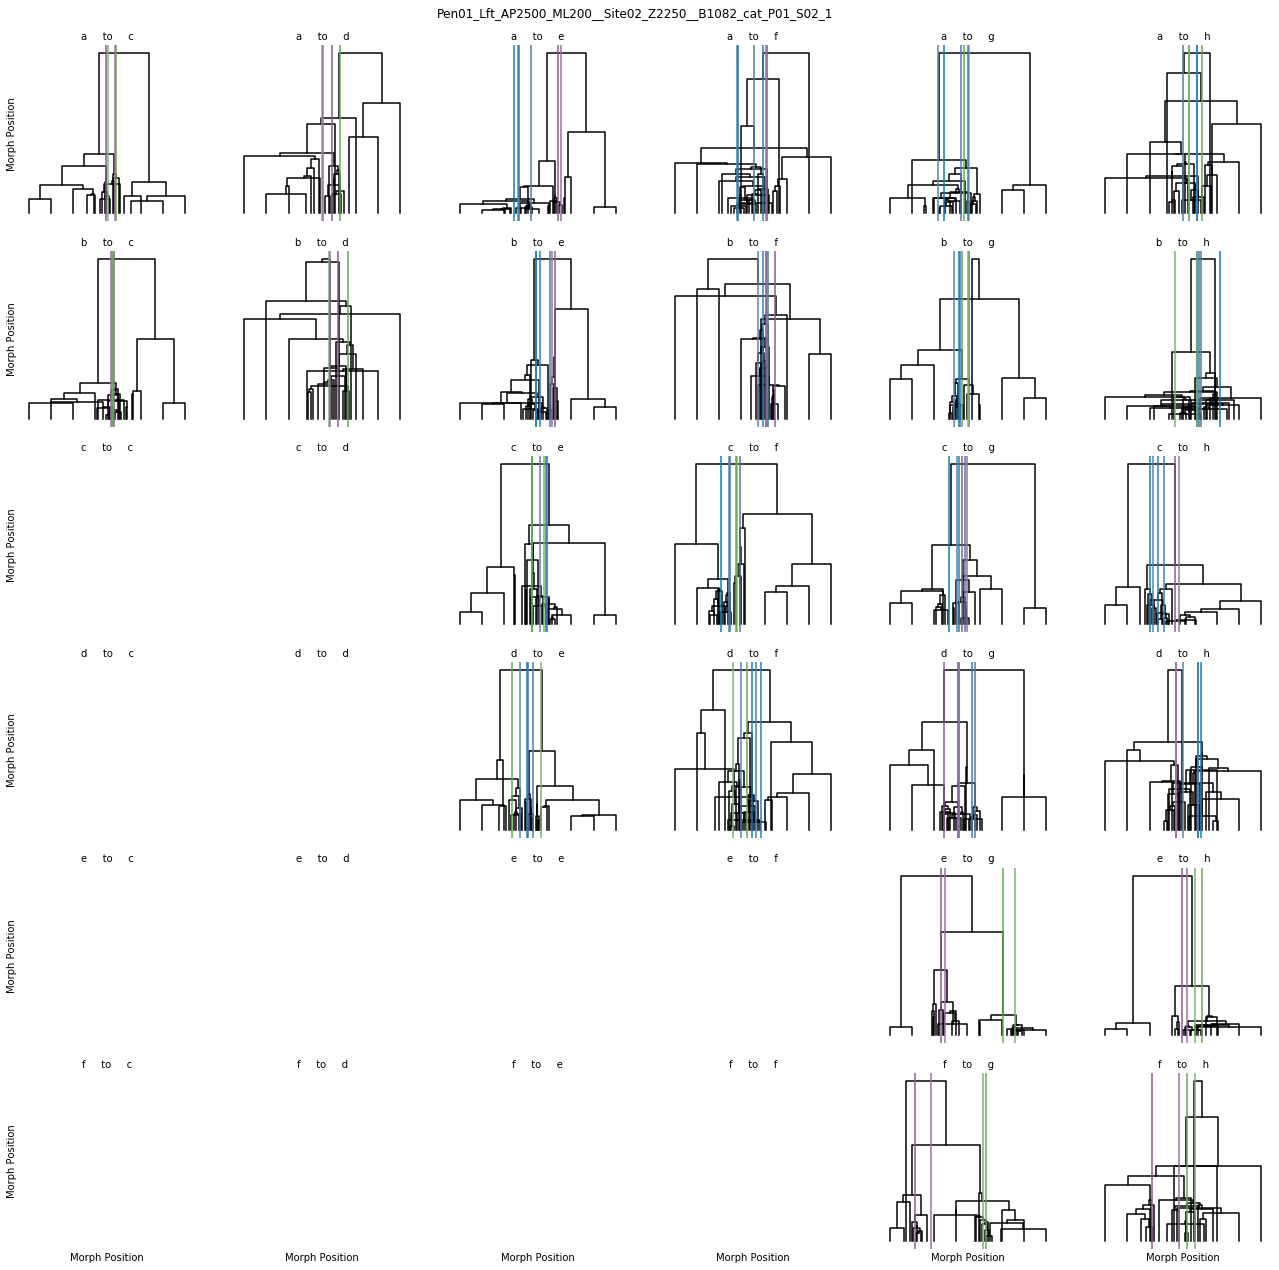

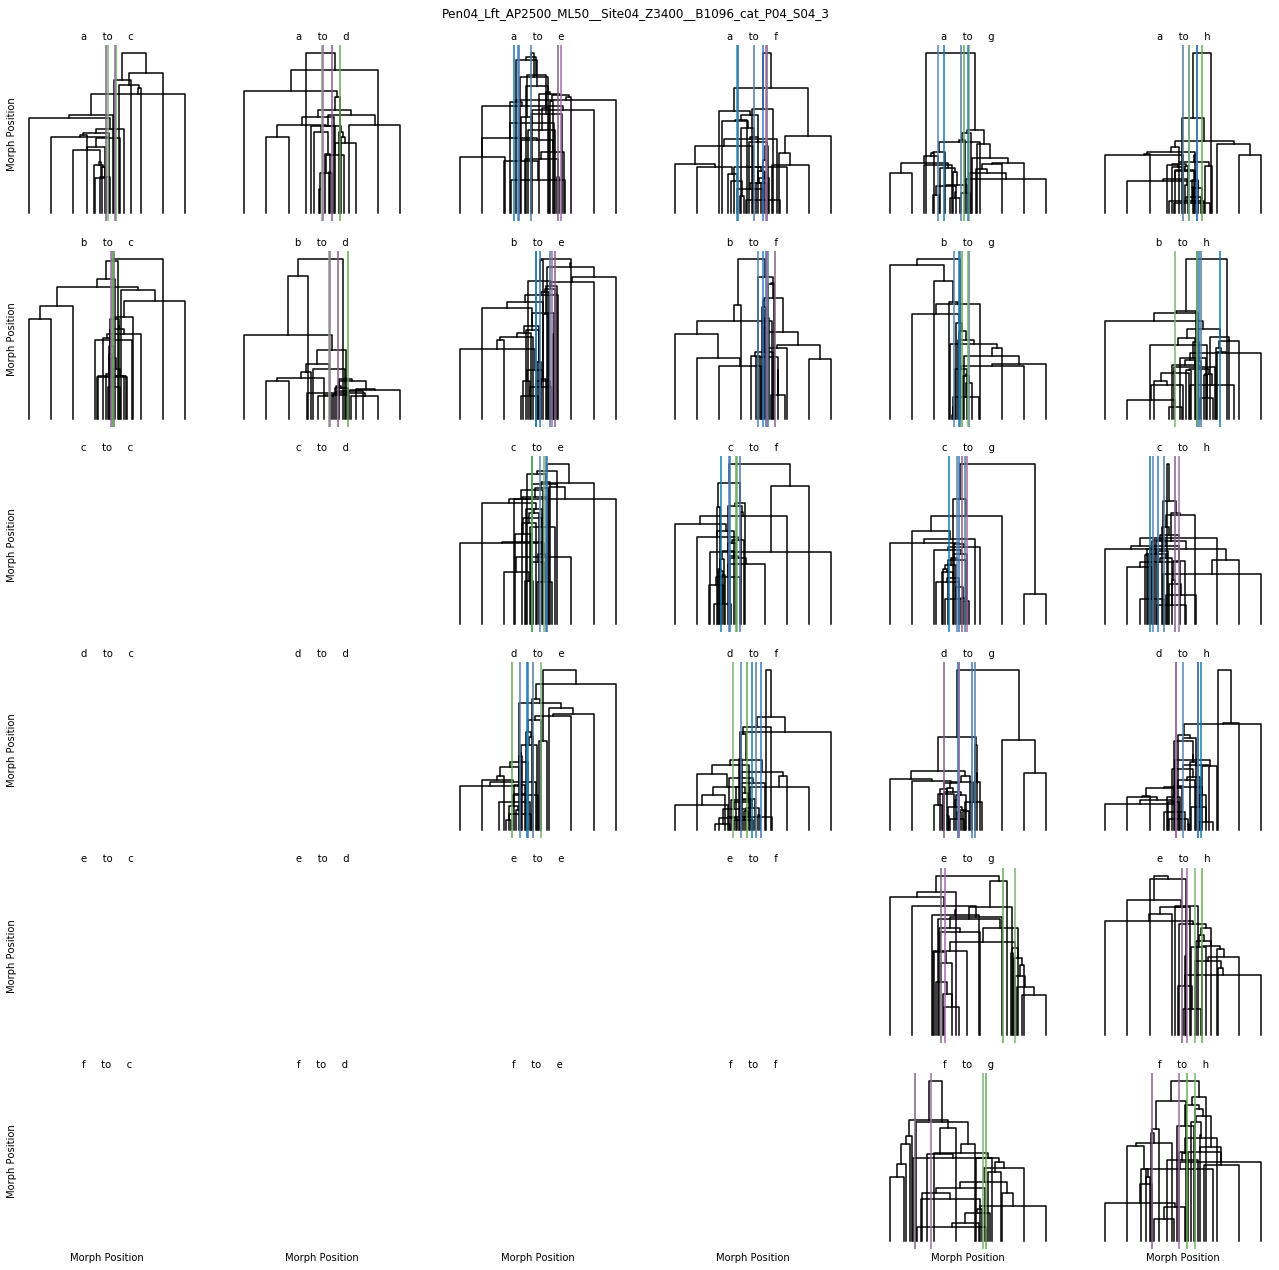

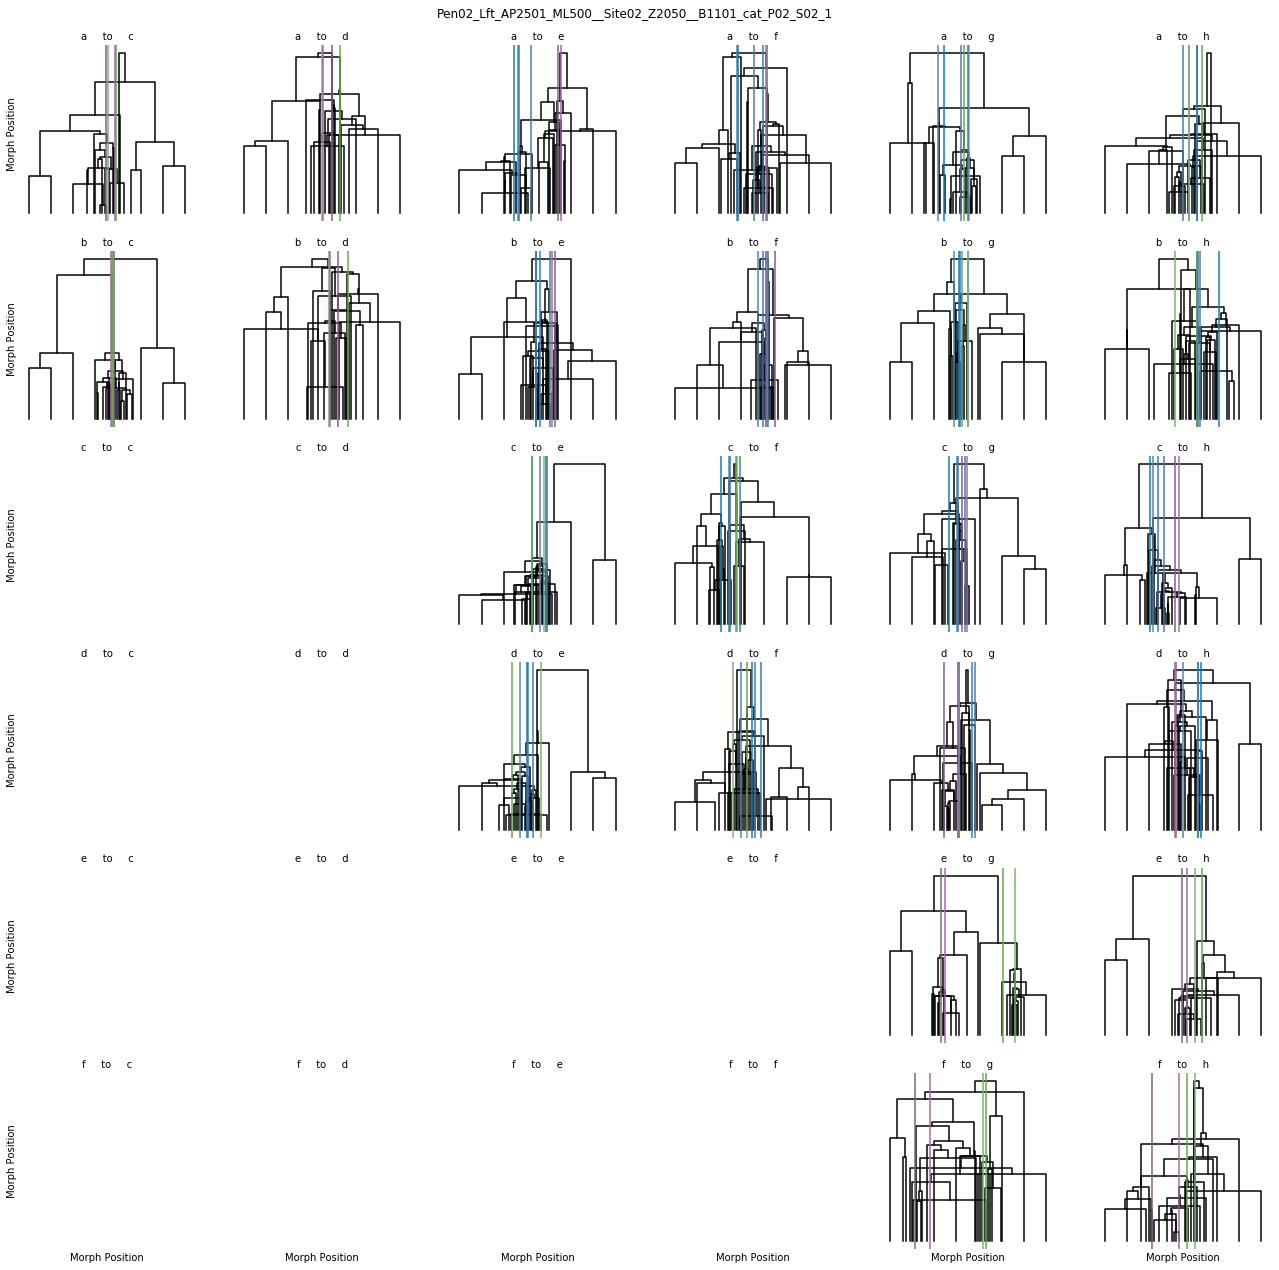

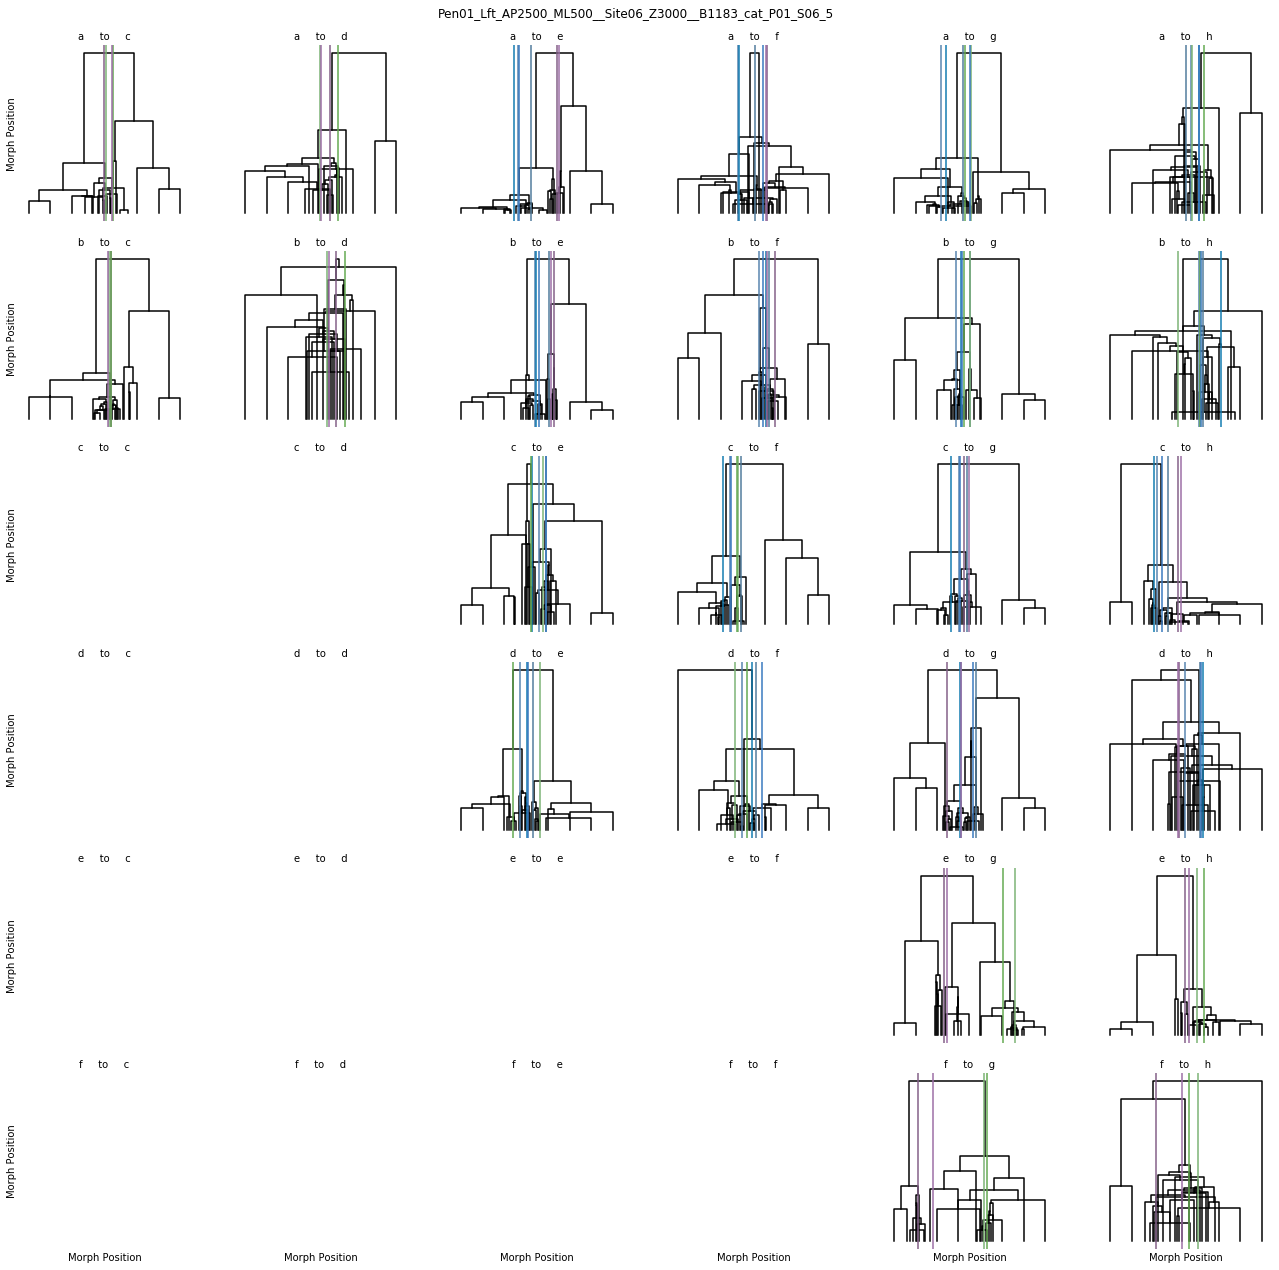

In [9]:
# method='average'
for i, (block_path, block_group) in enumerate(pair_df.groupby("block_path")):
    if i % 10 == 0:
        morph_dendrogram_viz(block_group, title=morphs.data.parse.blockpath_name(block_path), method='average')

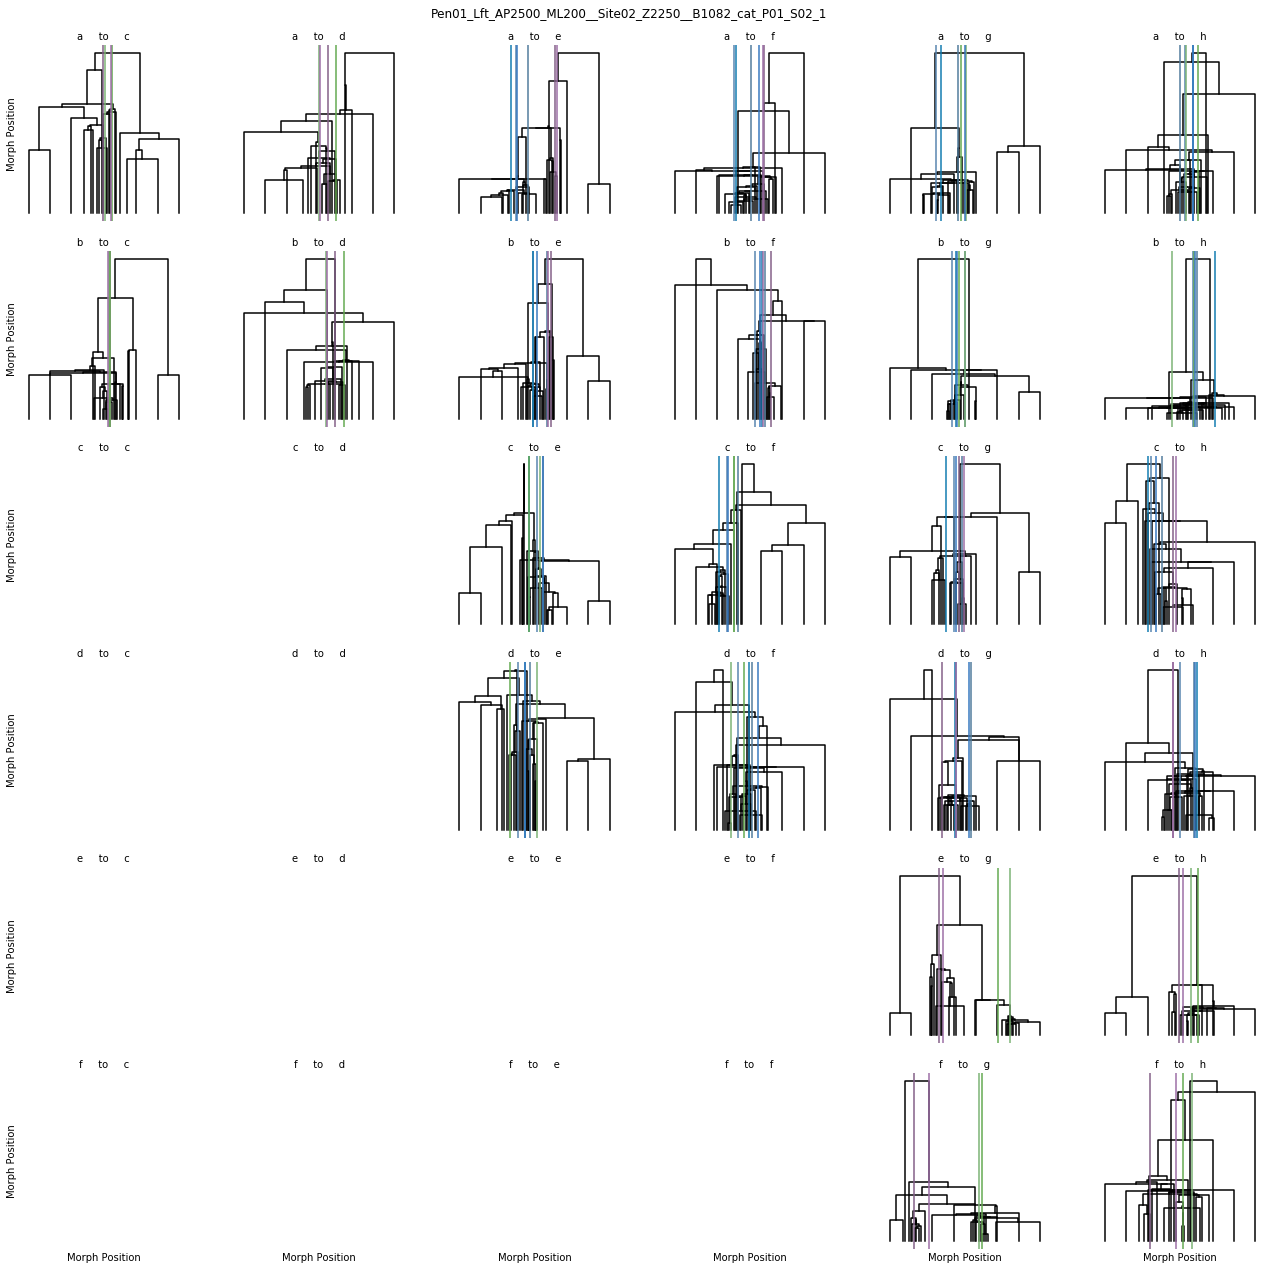

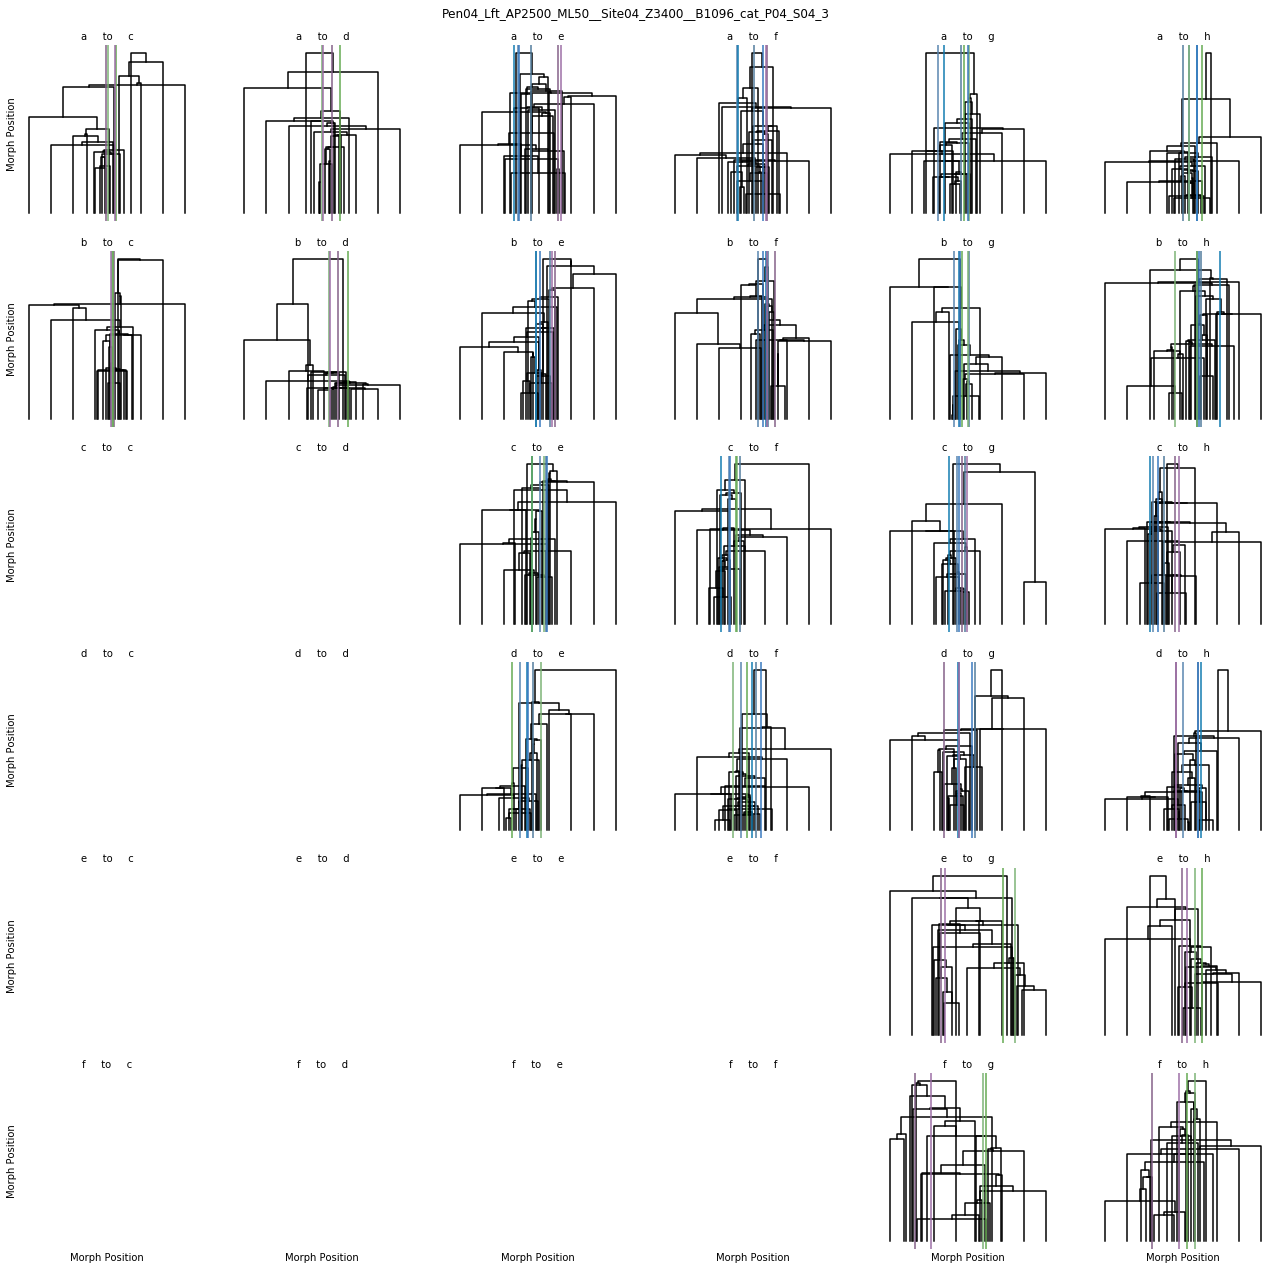

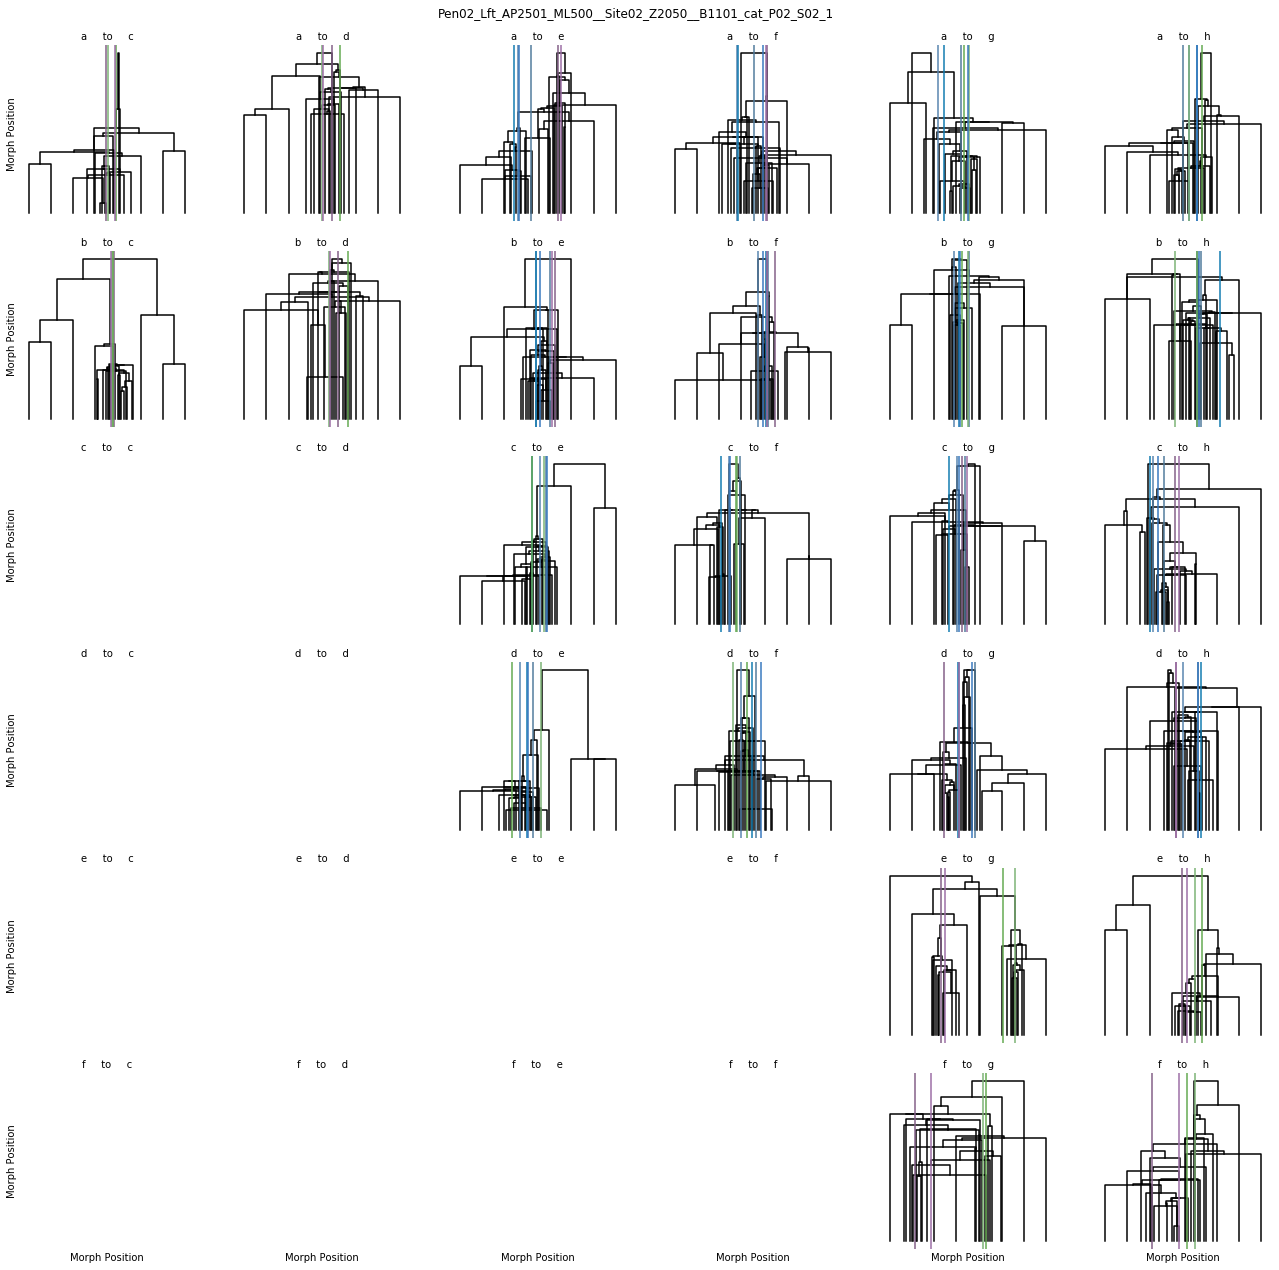

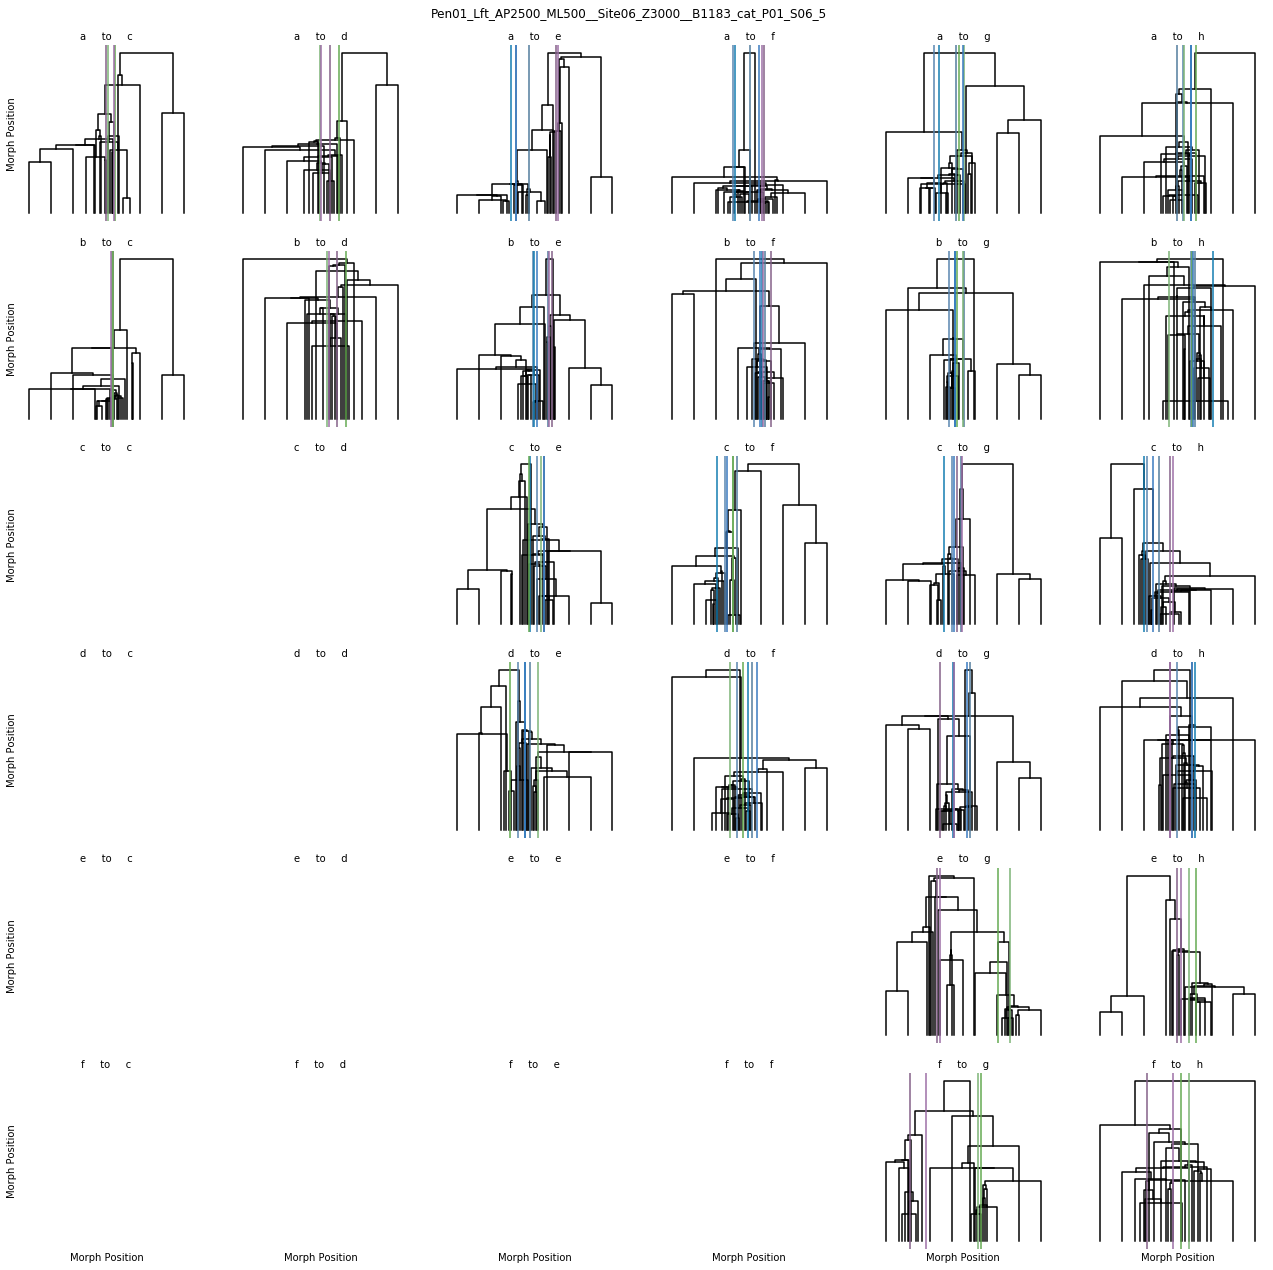

In [10]:
# method='single'
for i, (block_path, block_group) in enumerate(pair_df.groupby("block_path")):
    if i % 10 == 0:
        morph_dendrogram_viz(block_group, title=morphs.data.parse.blockpath_name(block_path), method='single')

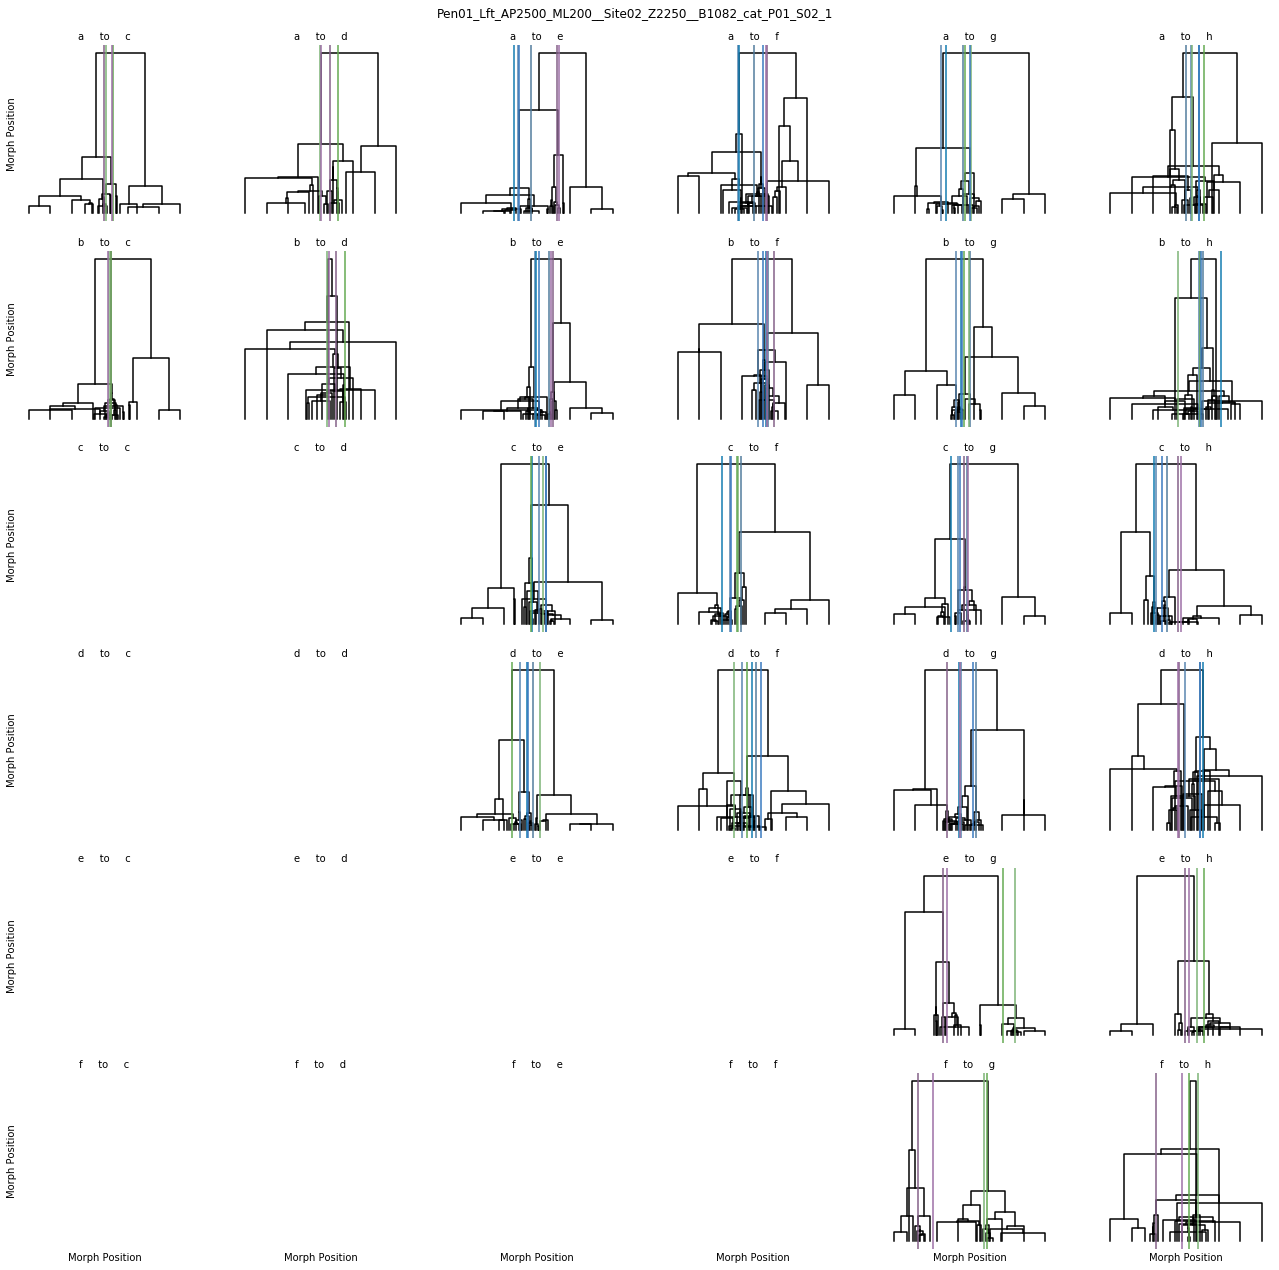

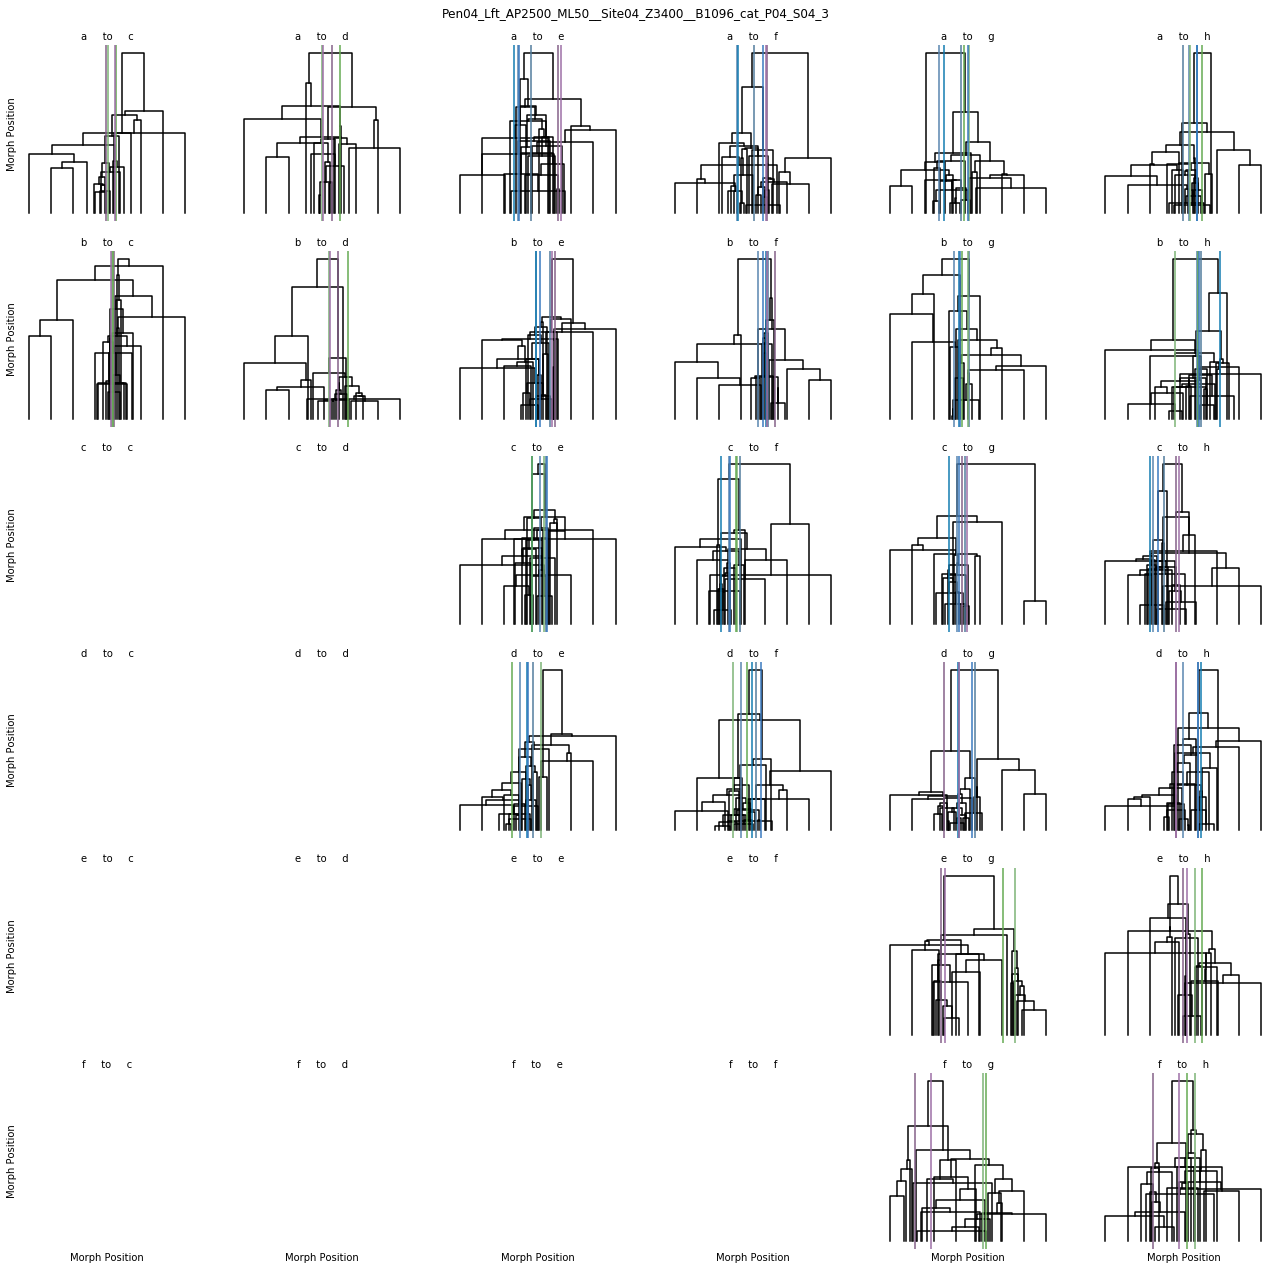

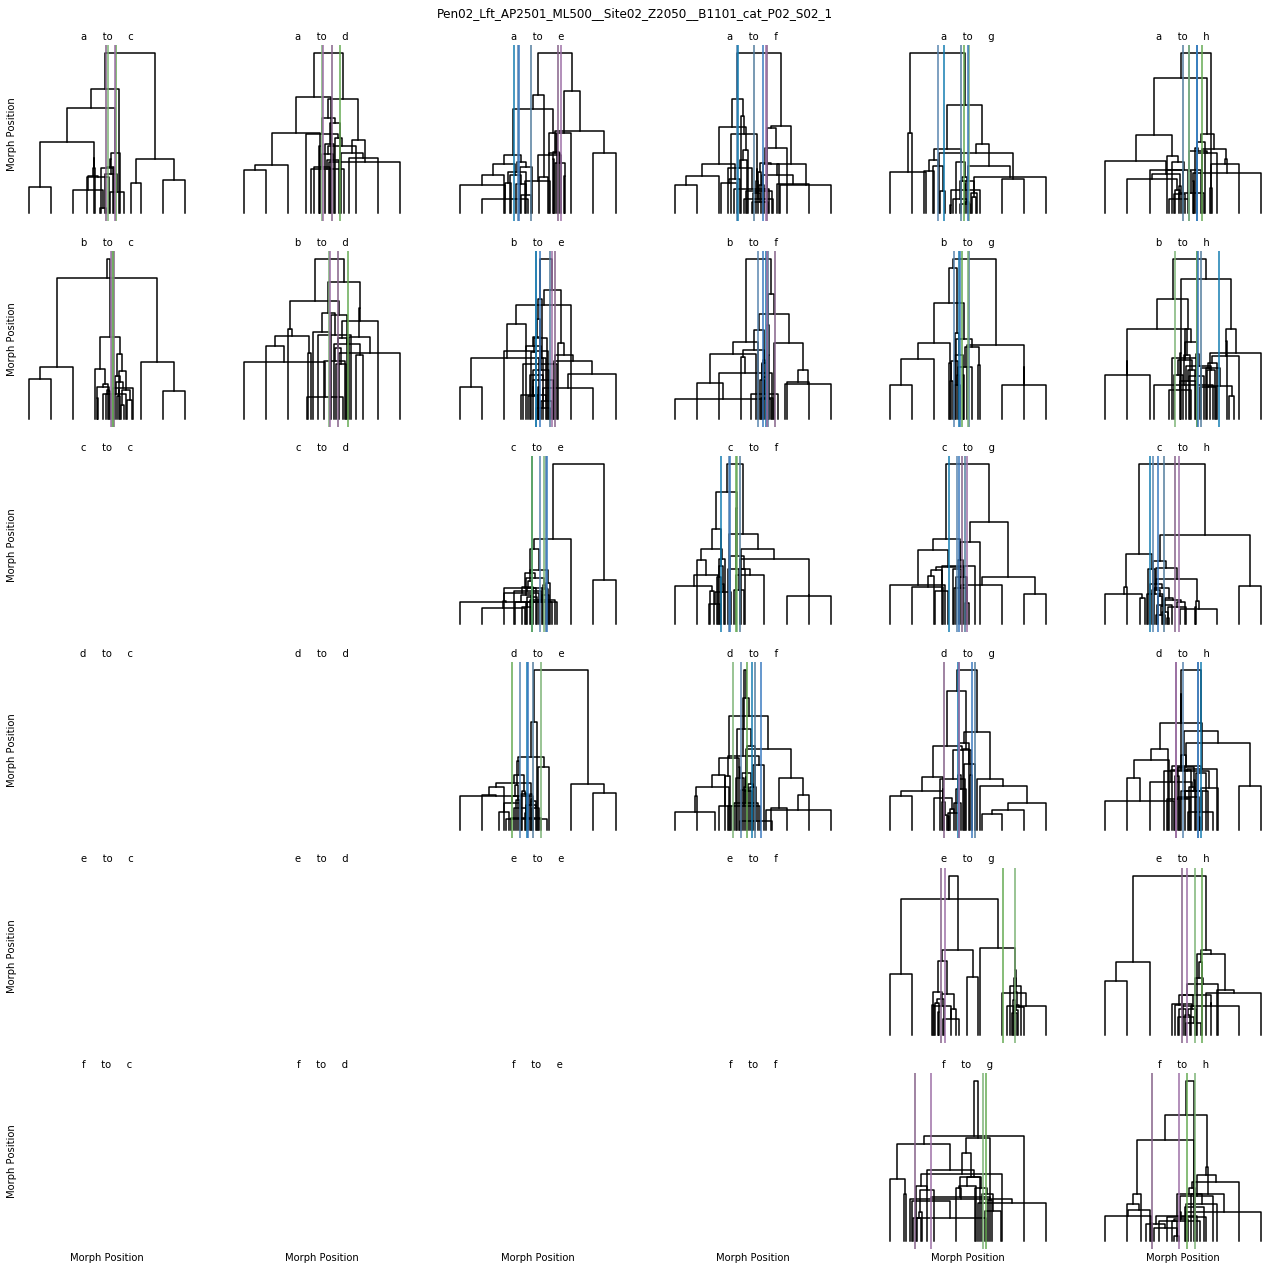

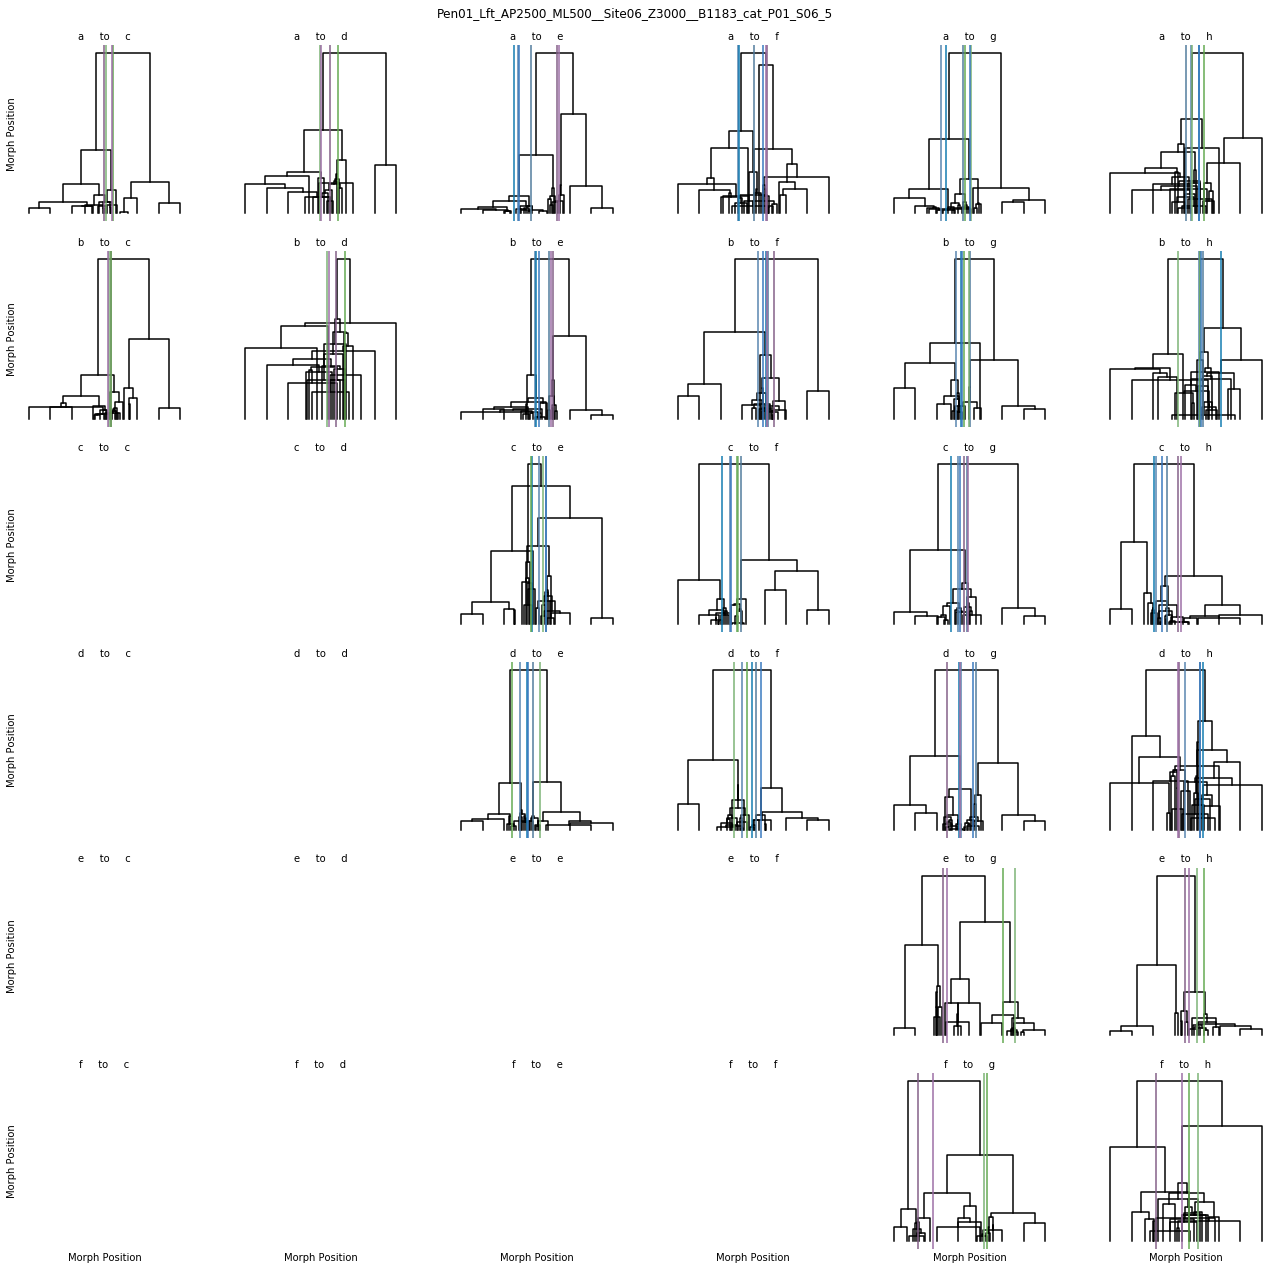

In [11]:
# method='complete'
for i, (block_path, block_group) in enumerate(pair_df.groupby("block_path")):
    if i % 10 == 0:
        morph_dendrogram_viz(block_group, title=morphs.data.parse.blockpath_name(block_path), method='complete')

In [12]:
equal_spacing = pair_df.groupby("block_path").apply(
    lambda path_group: np.all(
        path_group.groupby("morph_dim").apply(
            lambda group: len(group["lesser_morph_pos"].unique()) < 10
        )
    )
)

In [13]:
pair_df.groupby("block_path").apply(
    lambda path_group: set.intersection(
        *path_group.groupby("morph_dim").apply(
            lambda group: set(group["lesser_morph_pos"].unique())
        )
    )
)

block_path
/mnt/cube/mthielk/analysis/B1082/kwik/Pen01_Lft_AP2500_ML200__Site02_Z2250__B1082_cat_P01_S02_1           {128, 1, 37, 74, 110, 19, 55, 92}
/mnt/cube/mthielk/analysis/B1082/kwik/Pen02_Lft_AP2510_ML200__Site02_Z2000__B1082_cat_P02_S02_2           {128, 1, 37, 74, 110, 19, 55, 92}
/mnt/cube/mthielk/analysis/B1082/kwik/Pen02_Lft_AP2510_ML200__Site03_Z2250__B1082_cat_P02_S03_3           {128, 1, 37, 74, 110, 19, 55, 92}
/mnt/cube/mthielk/analysis/B1082/kwik/Pen02_Lft_AP2510_ML200__Site04_Z2450__B1082_cat_P02_S04_4           {128, 1, 37, 74, 110, 19, 55, 92}
/mnt/cube/mthielk/analysis/B1082/kwik/Pen02_Lft_AP2510_ML200__Site05_Z2700__B1082_cat_P02_S05_5           {128, 1, 37, 74, 110, 19, 55, 92}
/mnt/cube/mthielk/analysis/B1082/kwik/Pen02_Lft_AP2510_ML200__Site06_Z3000__B1082_cat_P02_S06_6           {128, 1, 37, 74, 110, 19, 55, 92}
/mnt/cube/mthielk/analysis/B1082/kwik/Pen03_Lft_AP2590_ML200__Site01_Z2000__B1082_cat_P03_S01_7           {128, 1, 37, 74, 110, 19, 55, 92}
/mnt/cube

In [14]:
# on recordings that only did evenly spaced positions, I used 9,
# on recordings that had sampled/proportional positions, I used 8
even_spaced_pos_9 = np.rint(np.linspace(1, 128, 9)).astype(int)
even_spaced_pos_8 = np.rint(np.linspace(1, 128, 8)).astype(int)

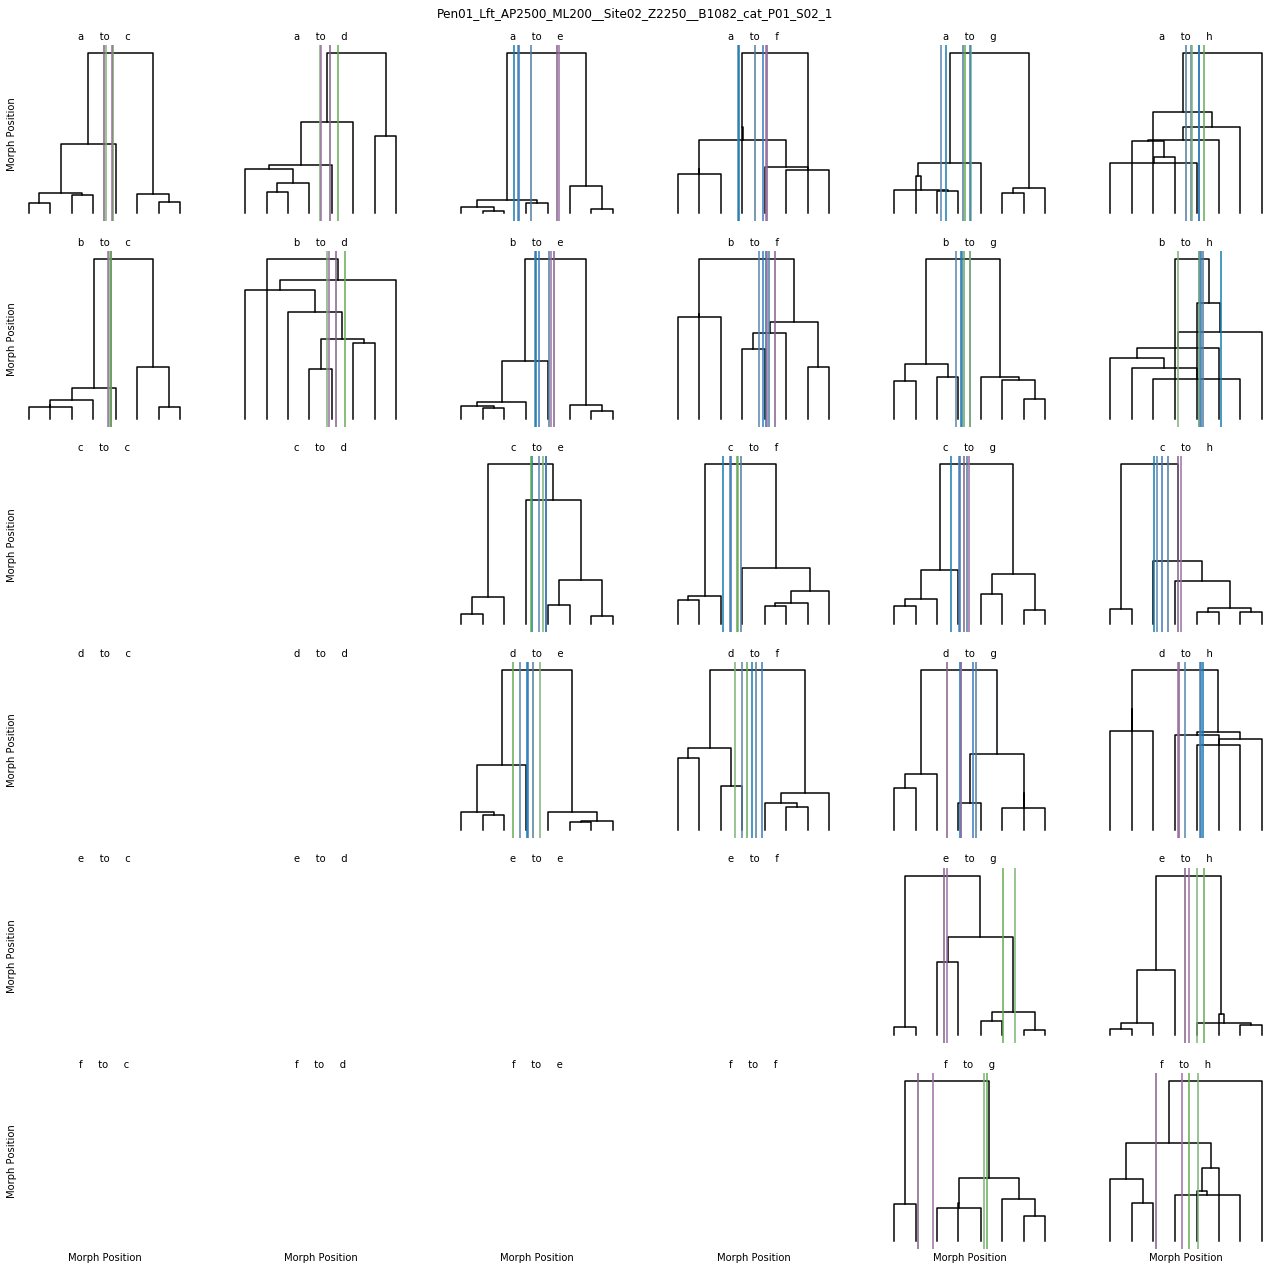

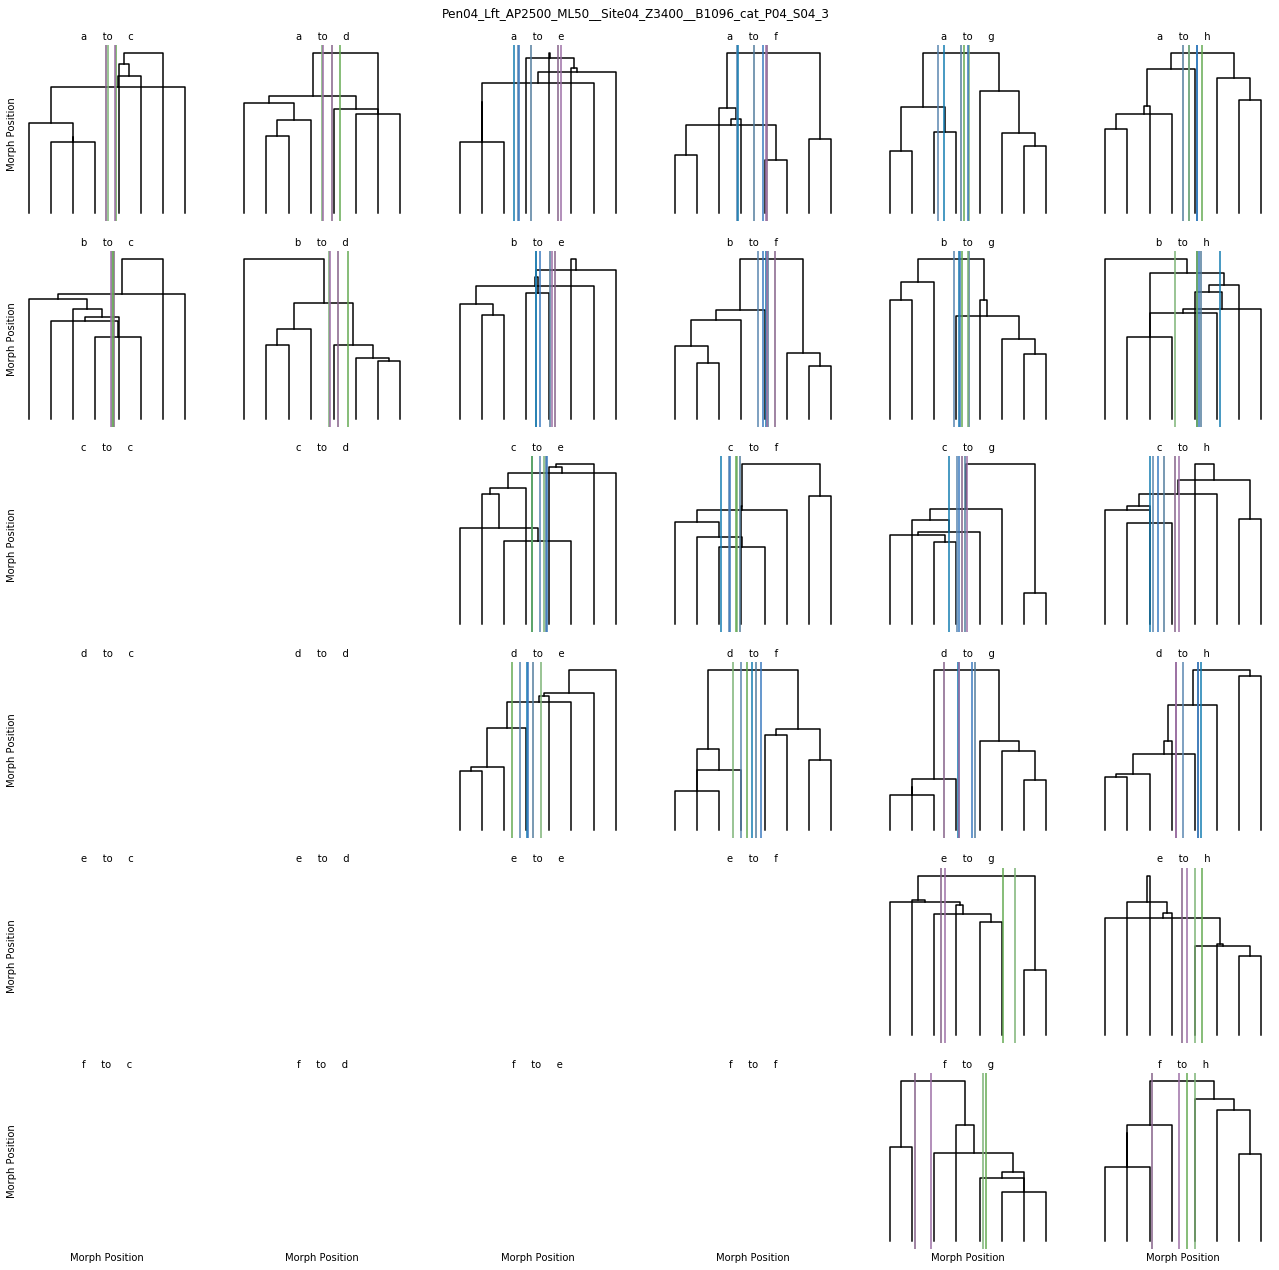

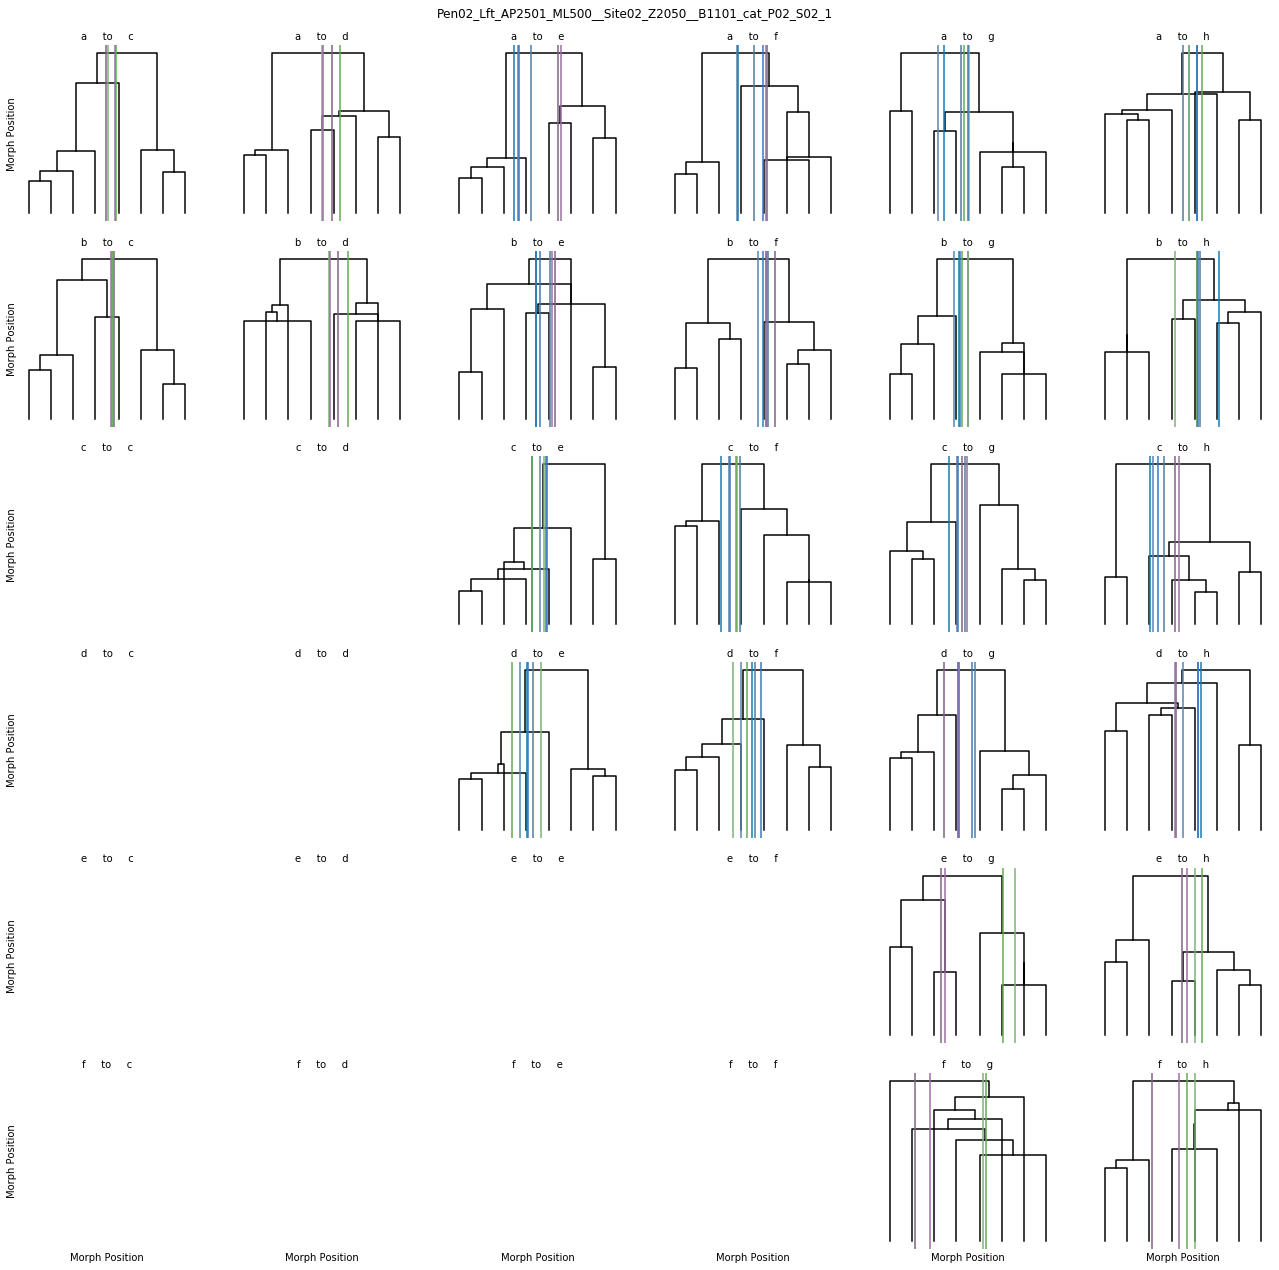

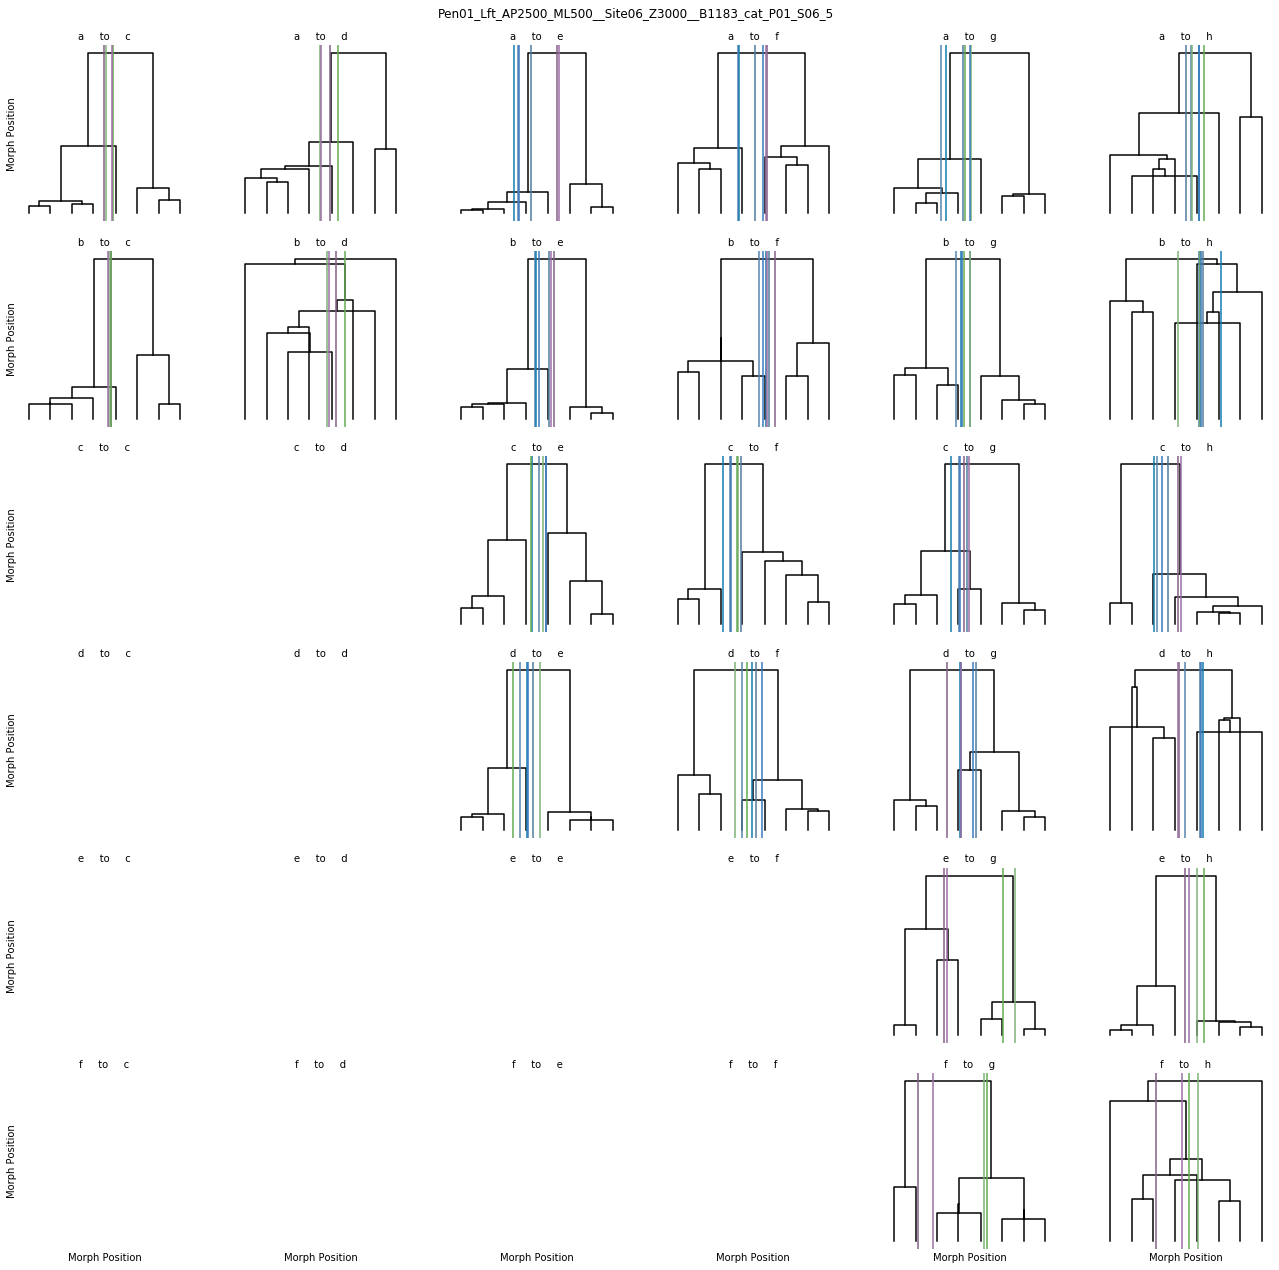

In [15]:
# method='average'
for i, (block_path, block_group) in enumerate(pair_df.groupby("block_path")):
    if i % 10 == 0:
        if equal_spacing[block_path]:
            even_block_group = block_group
        else:
            even_block_group = block_group[
                block_group["lesser_morph_pos"].isin(even_spaced_pos_8)
                & block_group["greater_morph_pos"].isin(even_spaced_pos_8)
            ]
        morph_dendrogram_viz(
            even_block_group,
            title=morphs.data.parse.blockpath_name(block_path),
            method="average",
        )

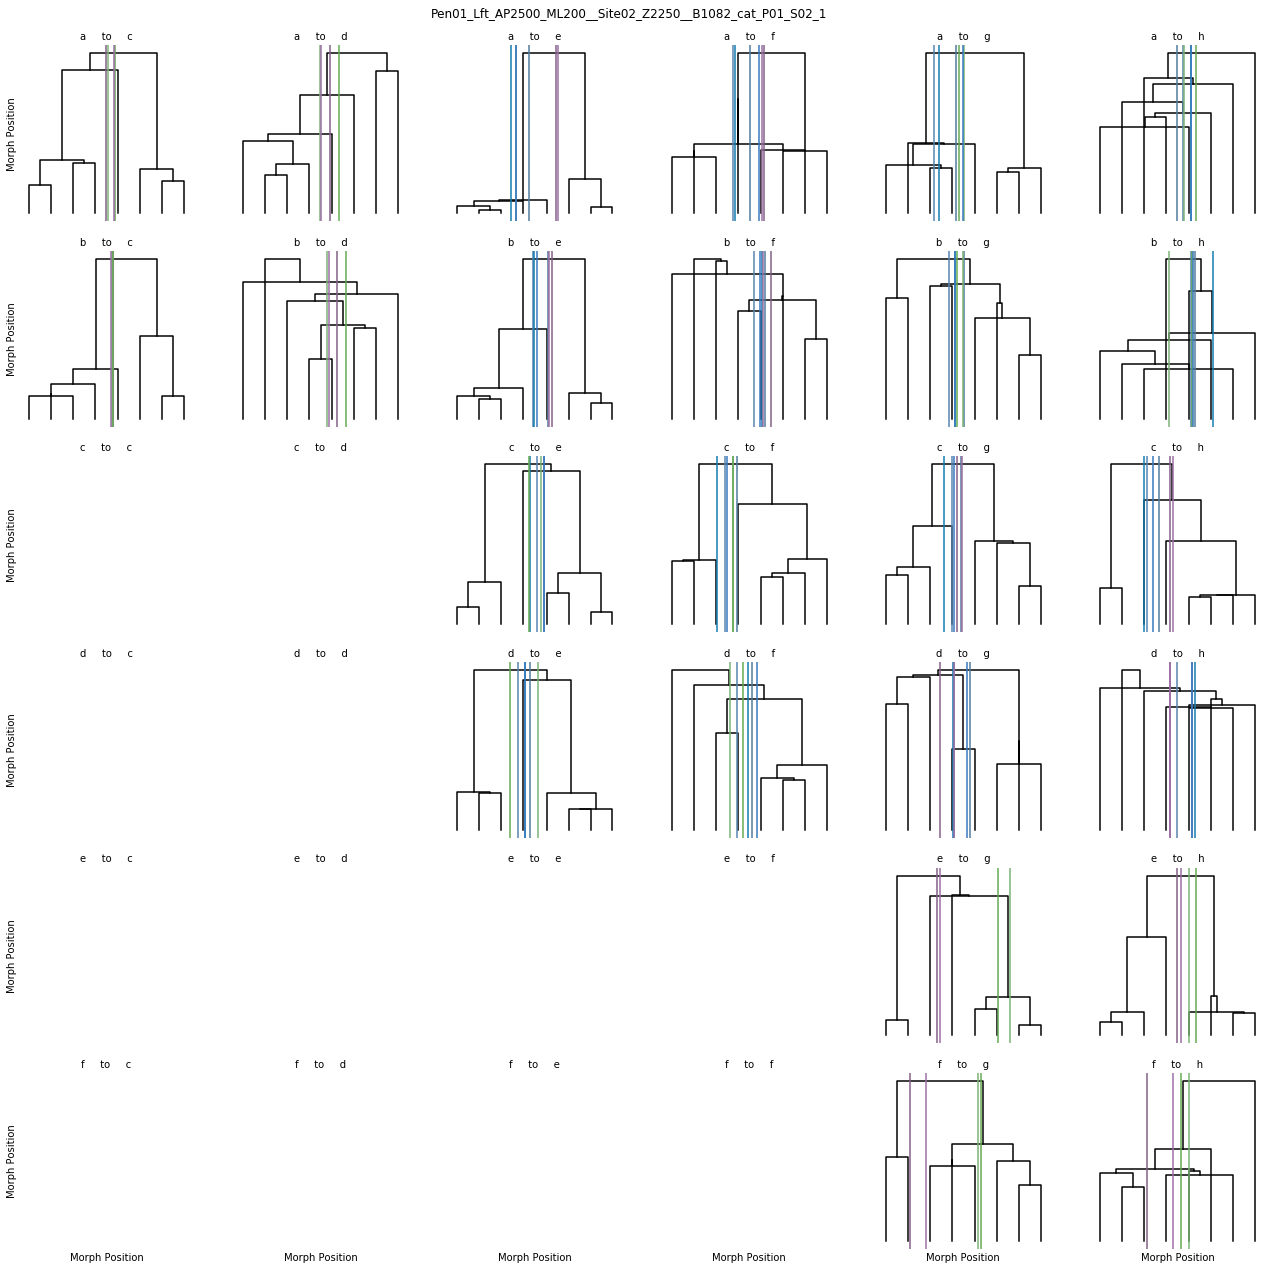

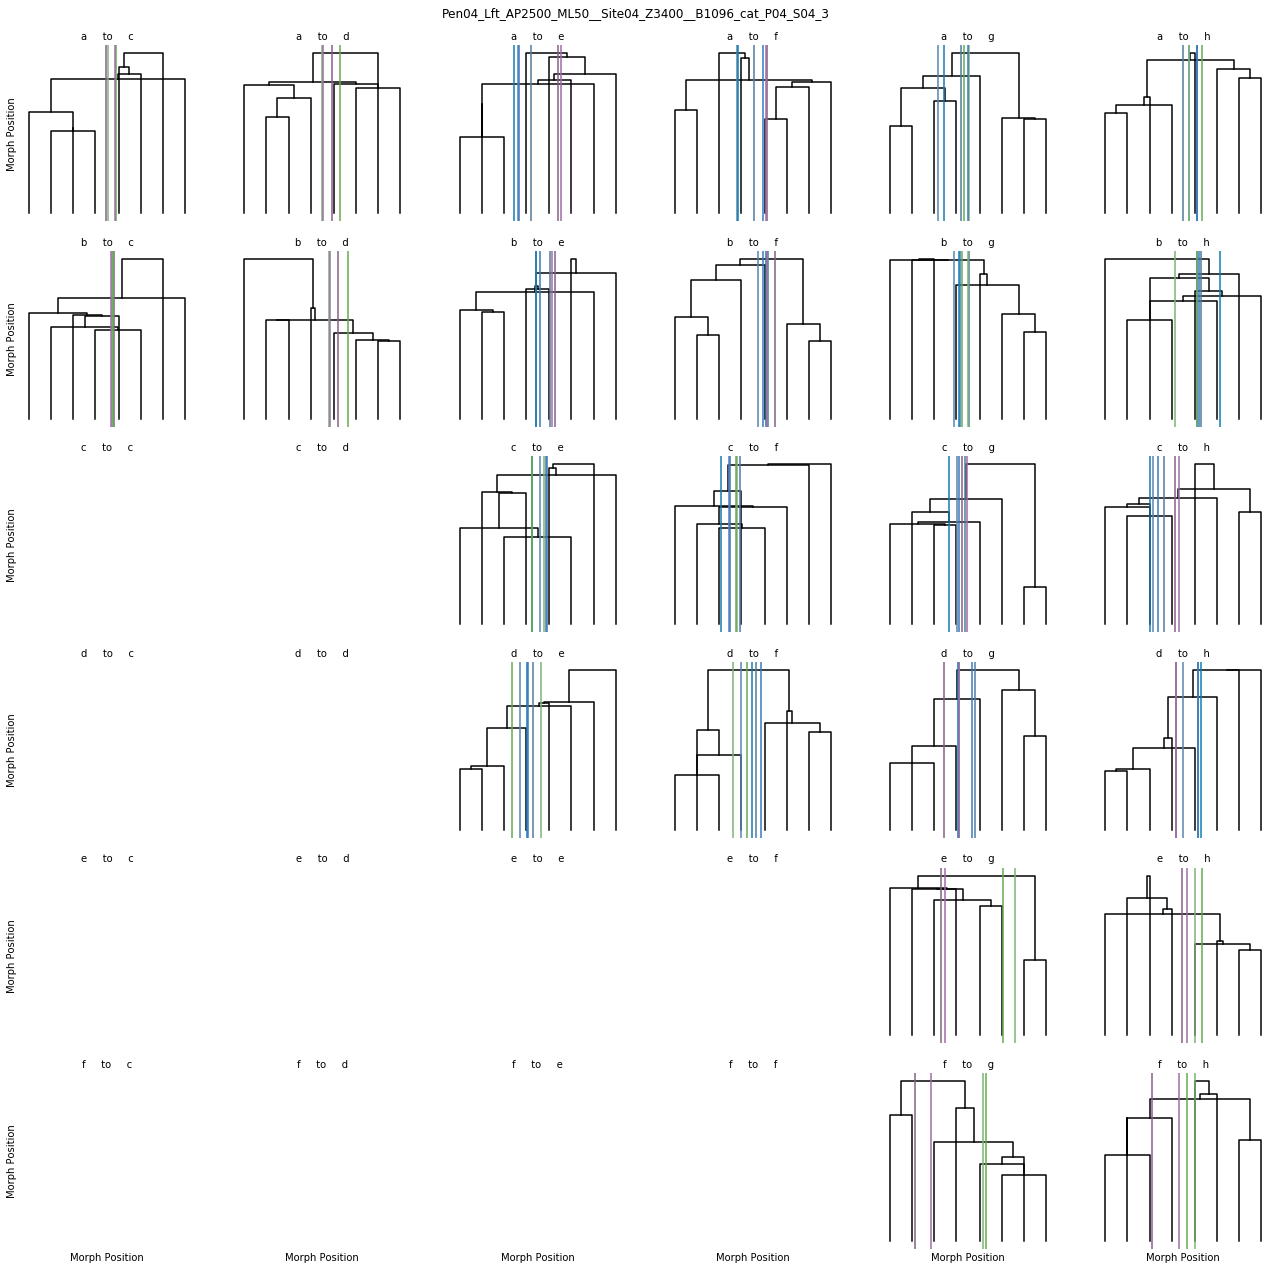

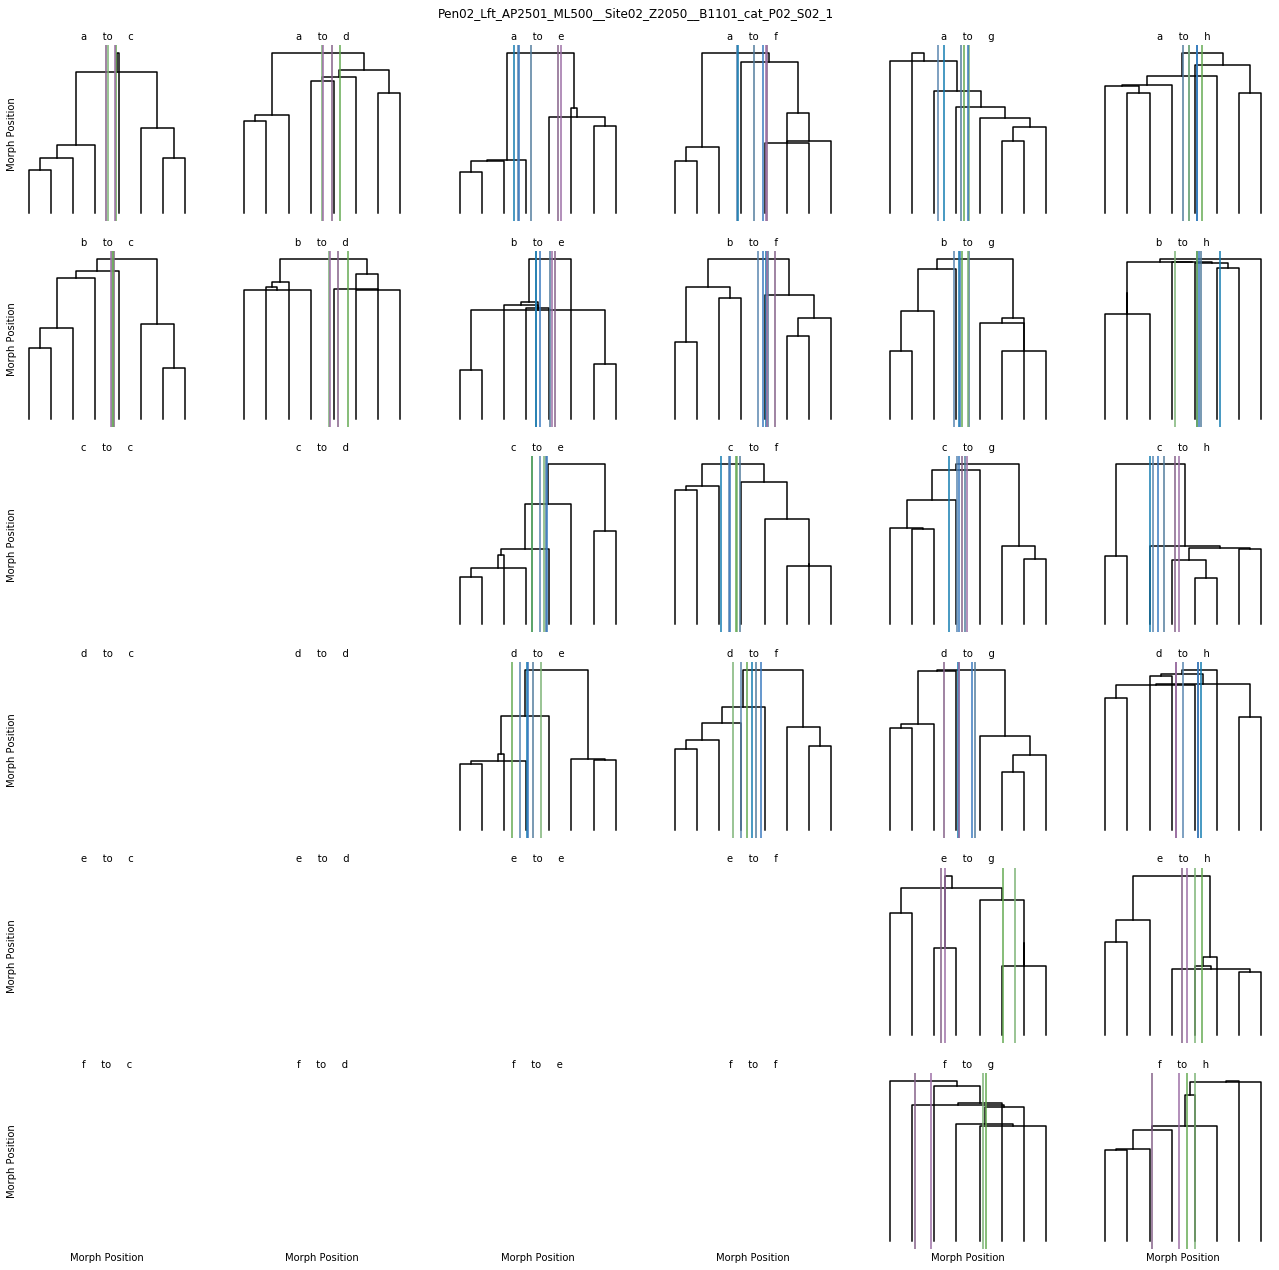

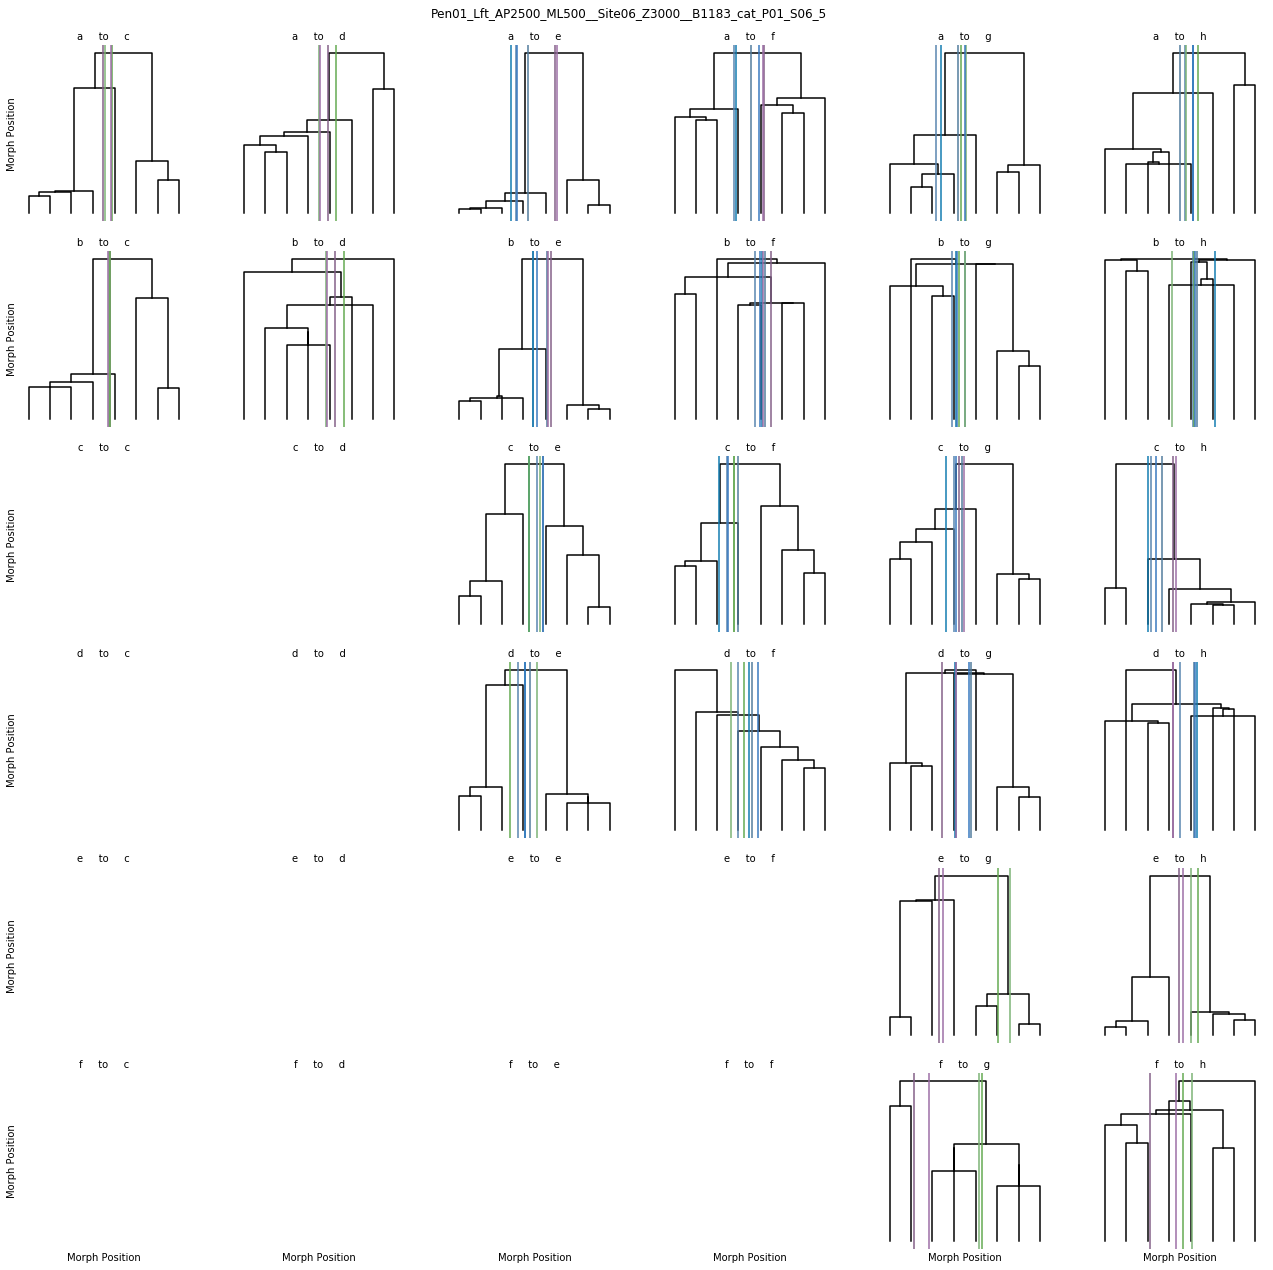

In [16]:
for i, (block_path, block_group) in enumerate(pair_df.groupby("block_path")):
    if i % 10 == 0:
        if equal_spacing[block_path]:
            even_block_group = block_group
        else:
            even_block_group = block_group[
                block_group["lesser_morph_pos"].isin(even_spaced_pos_8)
                & block_group["greater_morph_pos"].isin(even_spaced_pos_8)
            ]
        morph_dendrogram_viz(
            even_block_group,
            title=morphs.data.parse.blockpath_name(block_path),
            method="single",
        )

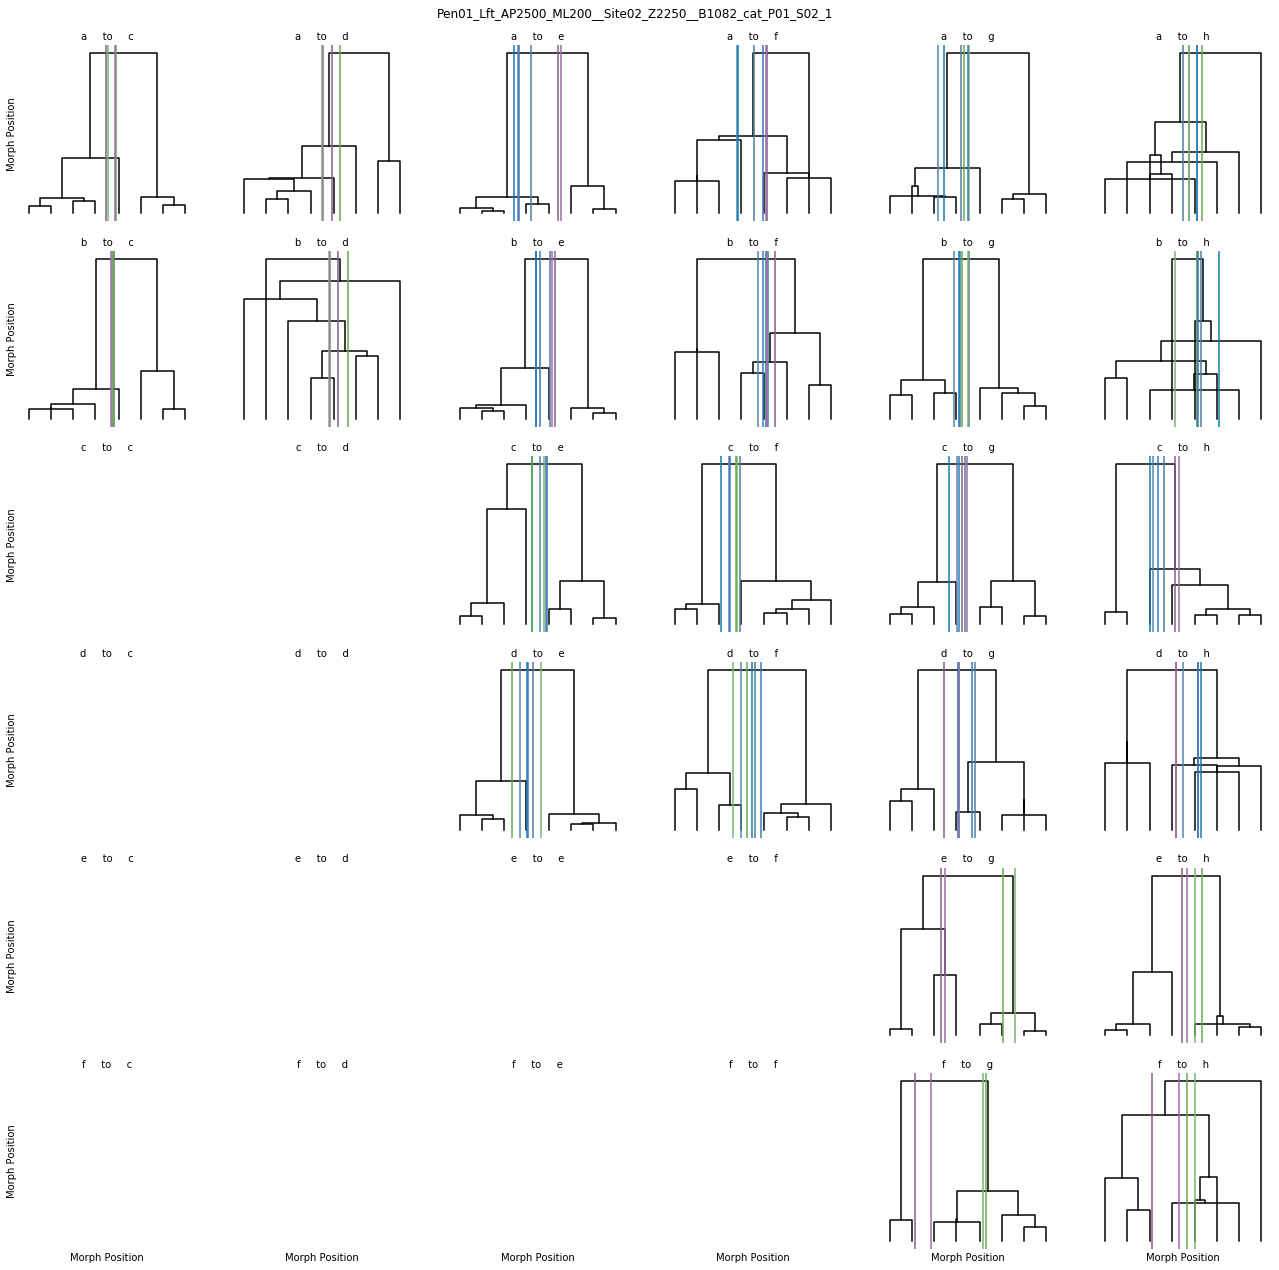

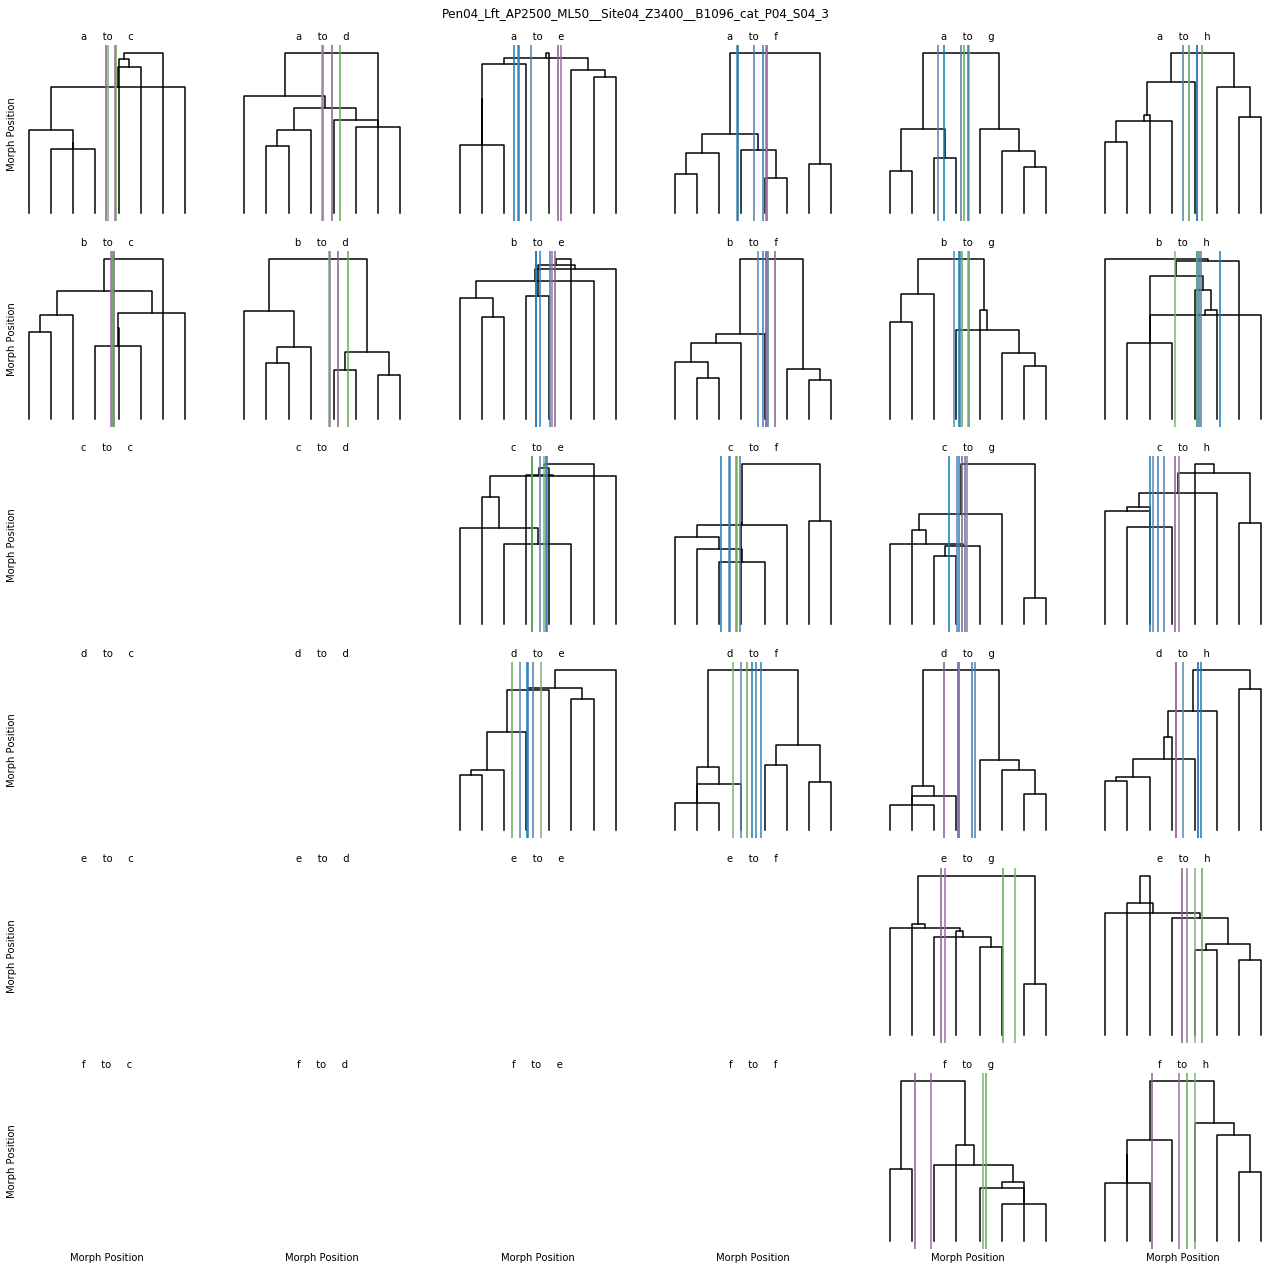

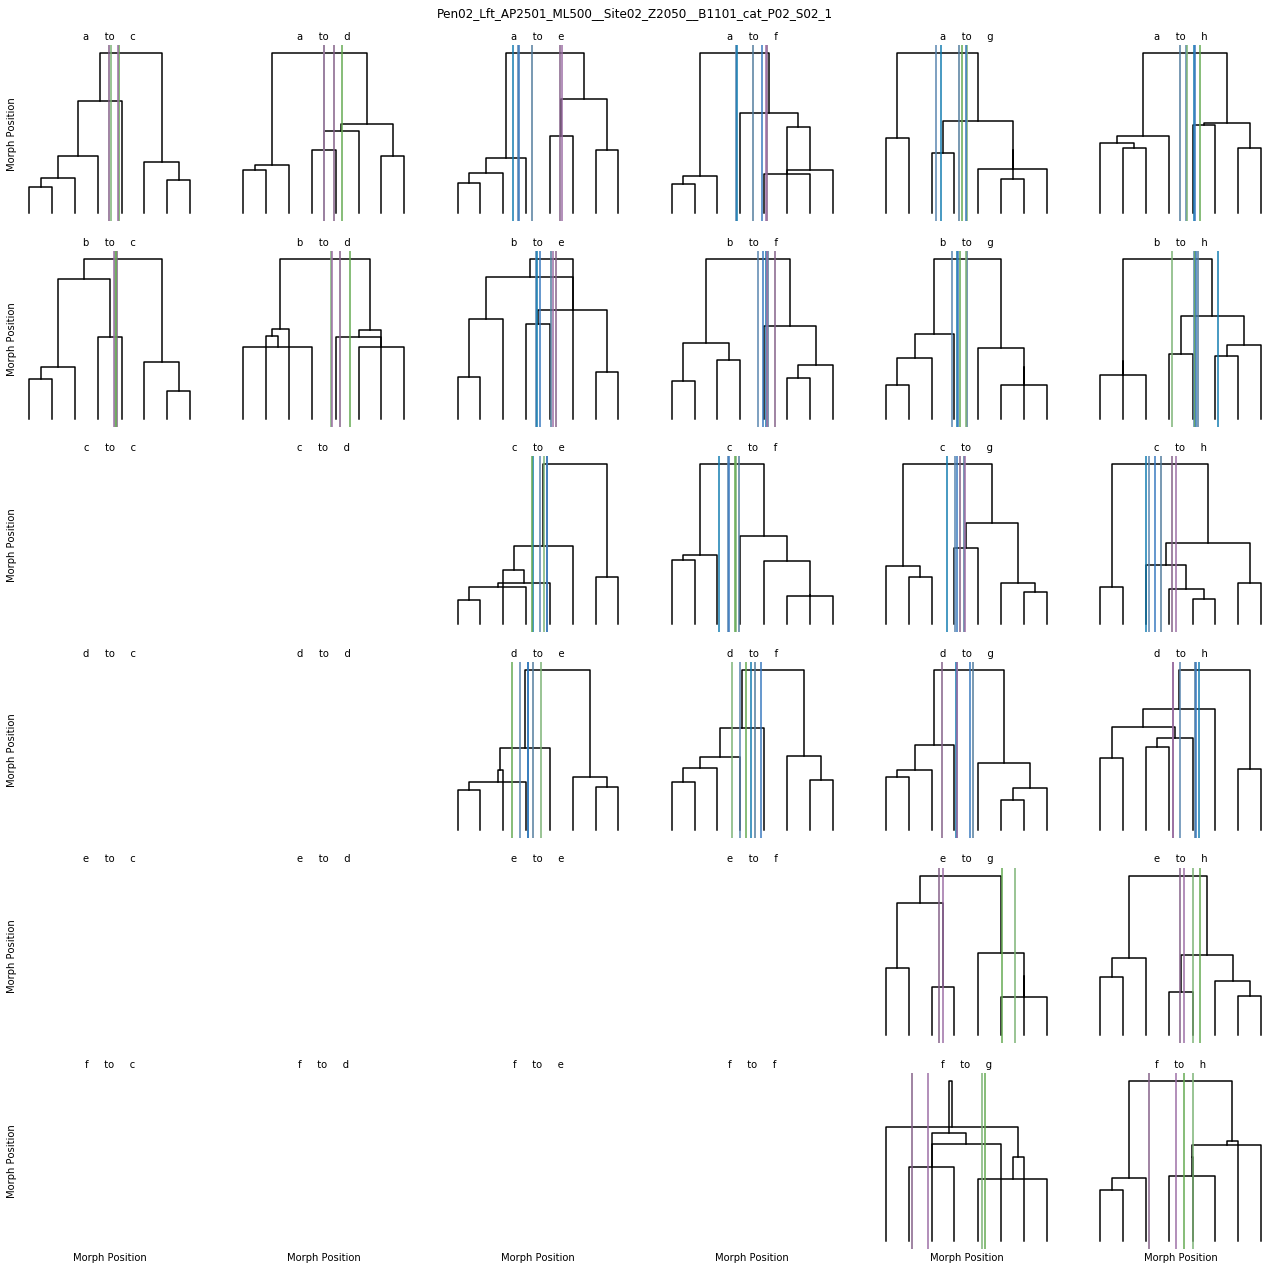

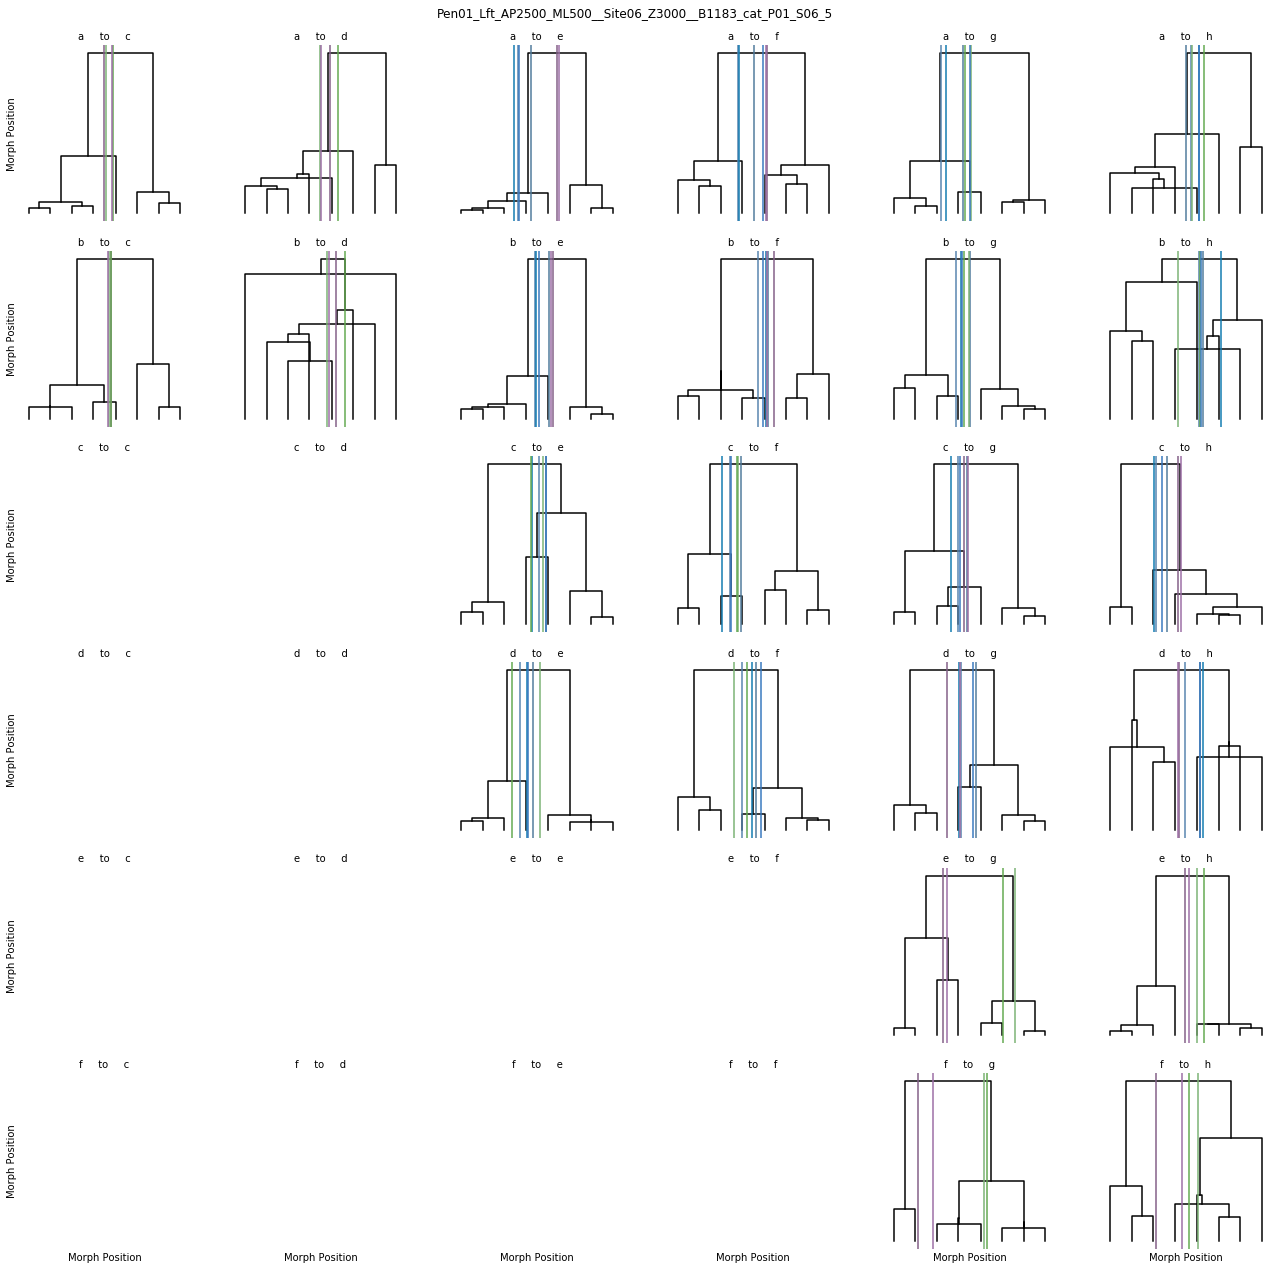

In [17]:
for i, (block_path, block_group) in enumerate(pair_df.groupby("block_path")):
    if i % 10 == 0:
        if equal_spacing[block_path]:
            even_block_group = block_group
        else:
            even_block_group = block_group[
                block_group["lesser_morph_pos"].isin(even_spaced_pos_8)
                & block_group["greater_morph_pos"].isin(even_spaced_pos_8)
            ]
        morph_dendrogram_viz(
            even_block_group,
            title=morphs.data.parse.blockpath_name(block_path),
            method="complete",
        )